In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats

In [3]:
# Define base paths
data_dir = "../../data/loaded"
Images_dir = "../../images/EDA_1"
soil_file_path = os.path.join(data_dir, "soil.csv")

In [4]:
soil_df = pd.read_csv(soil_file_path)

## General inspection

In [4]:
soil_df.head()

,longitude,latitude,HWSD2_SMU_ID,LAYER,COARSE,SAND,SILT,CLAY,TEXTURE_USDA,TEXTURE_SOTER,...,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND
0,-8.670833,37.545833,65535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-8.662500,37.545833,65535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-8.654167,37.545833,65535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-8.645833,37.545833,65535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-8.637500,37.545833,65535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("shape:", soil_df.shape)
print("columns:", soil_df.columns)
print("missing values:\n", soil_df.isnull().sum())

shape: (9352670, 26)
columns: Index(['longitude', 'latitude', 'HWSD2_SMU_ID', 'LAYER', 'COARSE', 'SAND',
       'SILT', 'CLAY', 'TEXTURE_USDA', 'TEXTURE_SOTER', 'BULK', 'REF_BULK',
       'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY',
       'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM',
       'ELEC_COND'],
      dtype='object')
missing values:
 longitude              0
latitude               0
HWSD2_SMU_ID           0
LAYER            2239134
COARSE           2239134
SAND             2239134
SILT             2239134
CLAY             2239134
TEXTURE_USDA     3578666
TEXTURE_SOTER    2239134
BULK             2239134
REF_BULK         3578666
ORG_CARBON       2239134
PH_WATER         2239134
TOTAL_N          2239134
CN_RATIO         2239134
CEC_SOIL         2239134
CEC_CLAY         2239134
CEC_EFF          2239134
TEB              2239134
BSAT             2239134
ALUM_SAT         2239134
ESP              2239134
TCARBON_EQ       2239134
GYP

In [10]:
print("number and percentage of rows where all values are null except longitude/latitude/HWSD2_SMU_ID:\n", soil_df[soil_df.drop(columns=['longitude', 'latitude', 'HWSD2_SMU_ID']).isnull().all(axis=1)].shape[0], "(", soil_df[soil_df.drop(columns=['longitude', 'latitude', 'HWSD2_SMU_ID']).isnull().all(axis=1)].shape[0] / soil_df.shape[0] * 100, "%)")

number and percentage of rows where all values are null except longitude/latitude/HWSD2_SMU_ID:
 2239134 ( 23.94112055701741 %)


C:\Users\T14s\AppData\Local\Temp\ipykernel_20632\3672073419.py:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\T14s\AppData\Local\Temp\ipykernel_20632\3672073419.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')
C:\Users\T14s\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


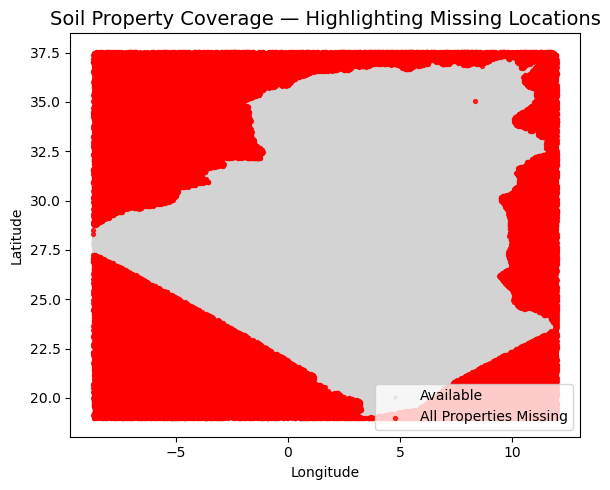

In [ ]:
# --- CONFIG ---
save_path = os.path.join(Images_dir, 'soil_all_missing_overlay.png')

# --- Identify soil property columns ---
soil_cols = [c for c in soil_df.columns if c not in ['longitude', 'latitude', 'HWSD2_SMU_ID']]

# --- Find where ALL soil properties are missing (vectorized) ---
mask_all_missing = np.all(soil_df[soil_cols].isna().values, axis=1)

# --- Optionally subsample if huge ---
if len(soil_df) > 300_000:
    idx = np.random.choice(len(soil_df), 300_000, replace=False)
    df_plot = soil_df.iloc[idx].copy()
    mask_all_missing = mask_all_missing[idx]
else:
    df_plot = soil_df.copy()

# --- Plot base map (all data in grey) ---
plt.figure(figsize=(6, 5))
plt.scatter(
    df_plot['longitude'], df_plot['latitude'],
    color='lightgrey', s=5, alpha=0.4, label='Available'
)

# --- Overlay missing points (in red) ---
plt.scatter(
    df_plot.loc[mask_all_missing, 'longitude'],
    df_plot.loc[mask_all_missing, 'latitude'],
    color='red', s=8, alpha=0.8, label='All Properties Missing'
)

# --- Labels and legend ---
plt.title('Soil Property Coverage — Highlighting Missing Locations', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()

# --- Save ---
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


-> except some few pixels, all pixels where all proprties are missing seem to fall outside the countries borders ( so probably they are to be dropped )

In [12]:
# print missing values of each column, from rows that have at least one non-null soil property
missing_values = soil_df[~soil_properties.isnull().all(axis=1)].isnull().sum()
print("Missing values in each column (for rows with at least one non-null soil property):\n", missing_values)
missing_values_percentage = missing_values / soil_df[~soil_properties.isnull().all(axis=1)].shape[0] * 100
print("Missing values percentage in each column (for rows with at least one non-null soil property):\n", missing_values_percentage)

Missing values in each column (for rows with at least one non-null soil property):
 longitude              0
latitude               0
HWSD2_SMU_ID           0
LAYER                  0
COARSE                 0
SAND                   0
SILT                   0
CLAY                   0
TEXTURE_USDA     1339532
TEXTURE_SOTER          0
BULK                   0
REF_BULK         1339532
ORG_CARBON             0
PH_WATER               0
TOTAL_N                0
CN_RATIO               0
CEC_SOIL               0
CEC_CLAY               0
CEC_EFF                0
TEB                    0
BSAT                   0
ALUM_SAT               0
ESP                    0
TCARBON_EQ             0
GYPSUM                 0
ELEC_COND              0
dtype: int64
Missing values percentage in each column (for rows with at least one non-null soil property):
 longitude         0.000000
latitude          0.000000
HWSD2_SMU_ID      0.000000
LAYER             0.000000
COARSE            0.000000
SAND              0.000

-> apart from all missing values rows, *TEXTURE_USDA* and *REF_BULK* have **18.8%** missing values

In [19]:
for column in soil_cols:
    print("nb unique values for", column, ":", soil_df[column].nunique(),"type:", soil_df[column].dtype)

nb unique values for LAYER : 1 type: object
nb unique values for COARSE : 30 type: float64
nb unique values for SAND : 49 type: float64
nb unique values for SILT : 36 type: float64
nb unique values for CLAY : 37 type: float64
nb unique values for TEXTURE_USDA : 7 type: float64
nb unique values for TEXTURE_SOTER : 4 type: object
nb unique values for BULK : 47 type: float64
nb unique values for REF_BULK : 41 type: float64
nb unique values for ORG_CARBON : 92 type: float64
nb unique values for PH_WATER : 36 type: float64
nb unique values for TOTAL_N : 75 type: float64
nb unique values for CN_RATIO : 15 type: float64
nb unique values for CEC_SOIL : 34 type: float64
nb unique values for CEC_CLAY : 46 type: float64
nb unique values for CEC_EFF : 52 type: float64
nb unique values for TEB : 55 type: float64
nb unique values for BSAT : 36 type: float64
nb unique values for ALUM_SAT : 17 type: float64
nb unique values for ESP : 24 type: float64
nb unique values for TCARBON_EQ : 59 type: float64


## Univariate Analysis

In [27]:
# =========================
# 🌾 STYLE CONFIGURATION
# =========================
sns.set_theme(
    style="whitegrid",
    font="DejaVu Sans",
    rc={
        "axes.titlesize": 10,
        "axes.labelsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
    }
)

# Define earthy color palette
EARTH_COLORS = {
    "sand": "#D4A373",    # soft sand beige
    "soil": "#7D5A50",    # dark soil brown
    "clay": "#A0522D",    # sienna brown
    "carbon": "#4F3426",  # rich dark brown
    "neutral": "#B5651D"  # medium brown
}

# =========================
# 🌿 UNIVARIATE FUNCTION
# =========================
def plot_univariate_distribution(column, dtype, color_key="soil"):
    """
    Univariate analysis for a soil property column.
    - Detects outliers and prints key stats.
    - Histogram + boxplot (numerical)
    - Clean countplot (categorical)
    - Earth-tone aesthetic for soil-related variables.
    """

    color = EARTH_COLORS.get(color_key, "#7D5A50")
    print(f"\n🌱  Univariate analysis for '{column}'\n" + "-"*60)

    # Handle numerical columns
    if dtype == "numerical":
        col_data = soil_df[column].dropna()

        # --- Summary stats ---
        print("📊 Summary statistics:")
        print(col_data.describe())

        # --- Outlier detection ---
        Q1, Q3 = col_data.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = col_data[(col_data < lower) | (col_data > upper)]
        pct_outliers = len(outliers) / len(col_data) * 100

        print(f"\n🚨 Outliers: {len(outliers)} ({pct_outliers:.2f}%)")
        if not outliers.empty:
            print(f"   - Low outliers:  {(outliers < lower).sum()}")
            print(f"   - High outliers: {(outliers > upper).sum()}")

        # --- Plot ---
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
        sns.histplot(col_data, bins='sturges', color=color, kde=True, ax=axes[0])
        axes[0].set_title(f"Histogram of {column}")
        axes[0].set_xlabel(column)
        axes[0].set_ylabel("Frequency")

        sns.boxplot(x=col_data, color=color, ax=axes[1])
        axes[1].set_title(f"Boxplot of {column}")
        axes[1].set_xlabel(column)

        plt.suptitle(f"{column} — Univariate Distribution", fontsize=13, fontweight='bold')
        plt.savefig(os.path.join(Images_dir, f"soil_univariate_{column}.png"), dpi=300, bbox_inches='tight')
        plt.show()

    # Handle categorical columns
    else:
        col_data = soil_df[column].dropna()
        order = col_data.value_counts().index

        plt.figure(figsize=(10, 4))
        sns.countplot(
            data=soil_df,
            x=column,
            order=order,
            hue=column,          # ✅ prevents palette warning
            palette=[color],     # single-tone aesthetic
            legend=False,
            edgecolor='black'
        )
        plt.xticks(rotation=60, ha='right')
        plt.title(f"Distribution of {column}", fontsize=14, fontweight='bold')
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.savefig(os.path.join(Images_dir, f"soil_univariate_{column}.png"), dpi=300, bbox_inches='tight')
        plt.show()

        print(f"🏷️ Mode of '{column}': {soil_df[column].mode(dropna=True).iloc[0]}")


In [28]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
categorical_cols = ['TEXTURE_USDA', 'TEXTURE_SOTER']
numerical_cols = [
    'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK', 'REF_BULK', 'ORG_CARBON',
    'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF',
    'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND'
]



🌱  Univariate analysis for 'TEXTURE_USDA'
------------------------------------------------------------


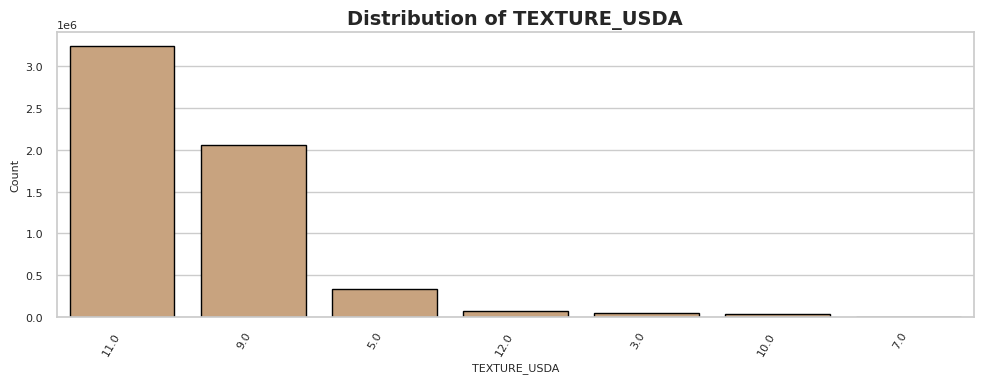

🏷️ Mode of 'TEXTURE_USDA': 11.0

🌱  Univariate analysis for 'TEXTURE_SOTER'
------------------------------------------------------------


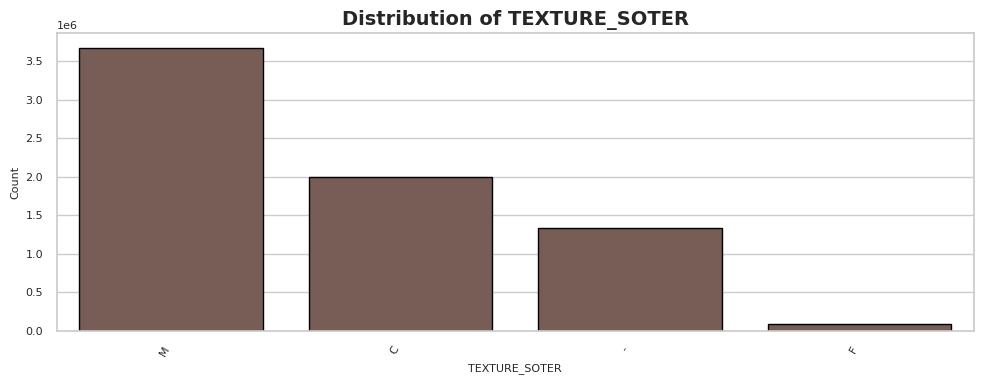

🏷️ Mode of 'TEXTURE_SOTER': M

🌱  Univariate analysis for 'COARSE'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     1.002545e+01
std      8.349130e+00
min     -9.000000e+00
25%      3.000000e+00
50%      1.200000e+01
75%      1.800000e+01
max      4.600000e+01
Name: COARSE, dtype: float64

🚨 Outliers: 23602 (0.33%)
   - Low outliers:  0
   - High outliers: 23602


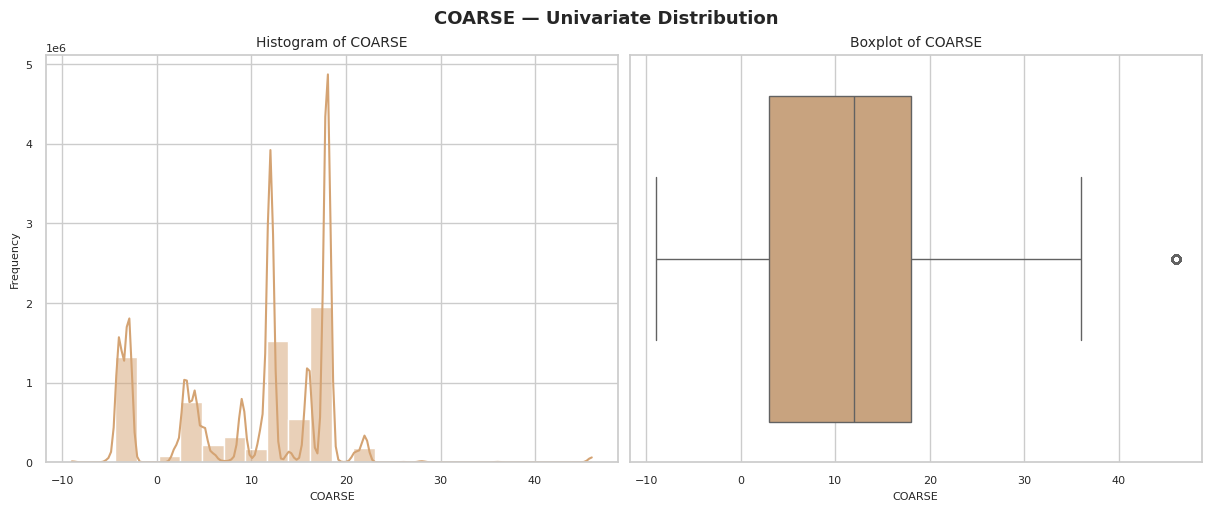


🌱  Univariate analysis for 'SAND'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     4.388369e+01
std      2.494090e+01
min     -9.000000e+00
25%      4.000000e+01
50%      4.900000e+01
75%      6.600000e+01
max      9.000000e+01
Name: SAND, dtype: float64

🚨 Outliers: 1339532 (18.83%)
   - Low outliers:  1339532
   - High outliers: 0


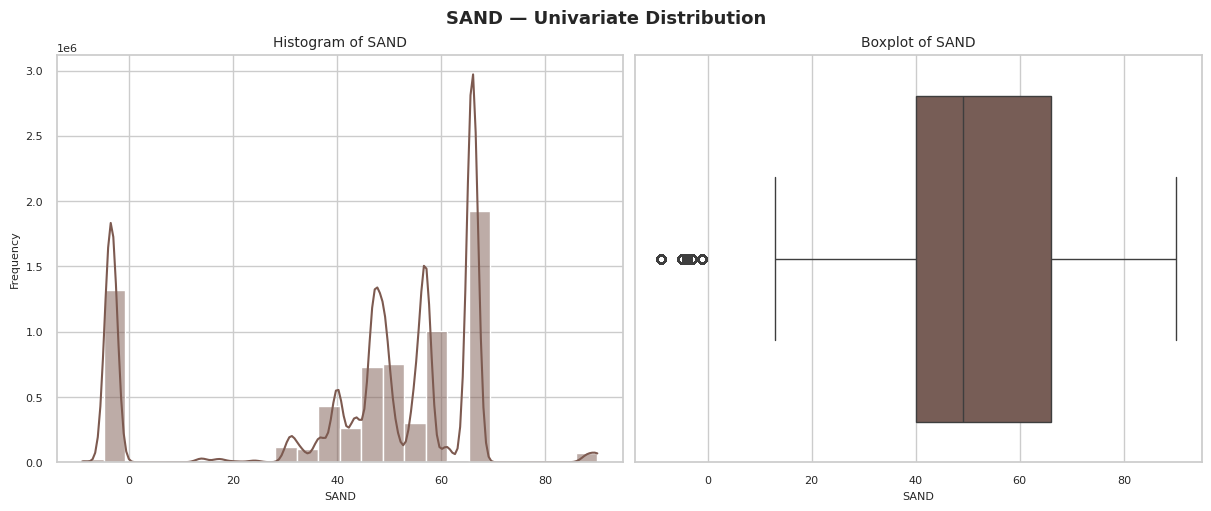


🌱  Univariate analysis for 'SILT'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     2.192869e+01
std      1.365069e+01
min     -9.000000e+00
25%      2.000000e+01
50%      2.700000e+01
75%      3.100000e+01
max      5.300000e+01
Name: SILT, dtype: float64

🚨 Outliers: 1340950 (18.85%)
   - Low outliers:  1339532
   - High outliers: 1418


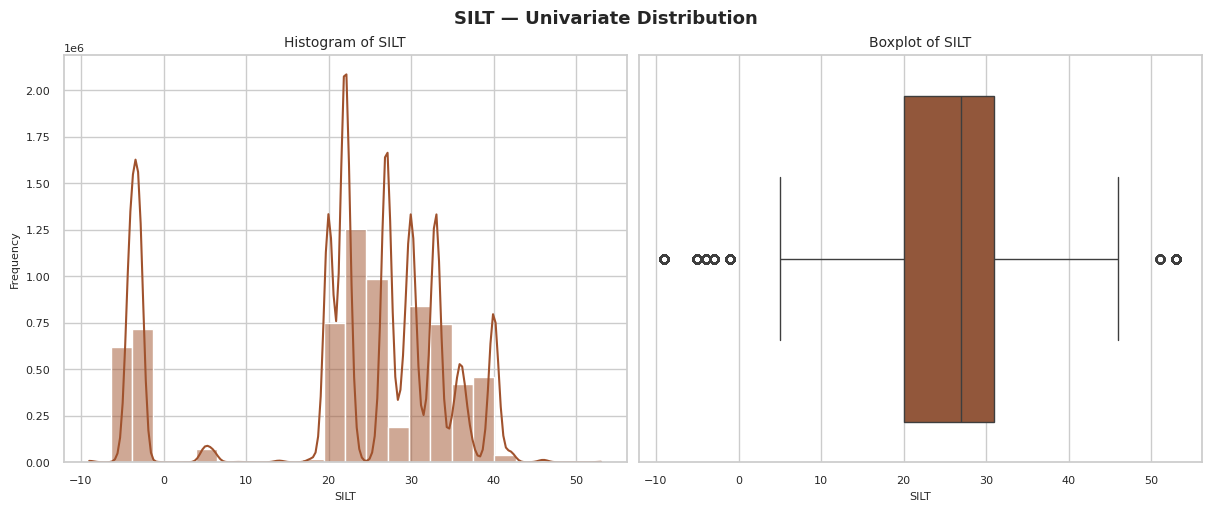


🌱  Univariate analysis for 'CLAY'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     1.338333e+01
std      9.660625e+00
min     -9.000000e+00
25%      1.200000e+01
50%      1.500000e+01
75%      1.800000e+01
max      5.500000e+01
Name: CLAY, dtype: float64

🚨 Outliers: 1714775 (24.11%)
   - Low outliers:  1339532
   - High outliers: 375243


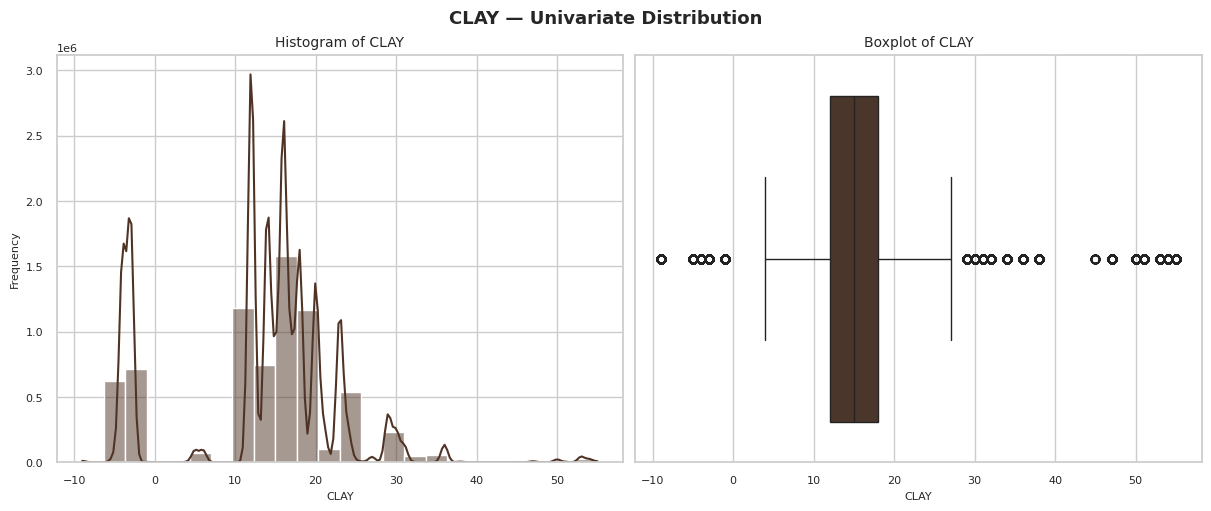


🌱  Univariate analysis for 'BULK'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     4.954842e-01
std      1.940243e+00
min     -9.000000e+00
25%      1.350000e+00
50%      1.420000e+00
75%      1.450000e+00
max      1.760000e+00
Name: BULK, dtype: float64

🚨 Outliers: 1417202 (19.92%)
   - Low outliers:  1356277
   - High outliers: 60925


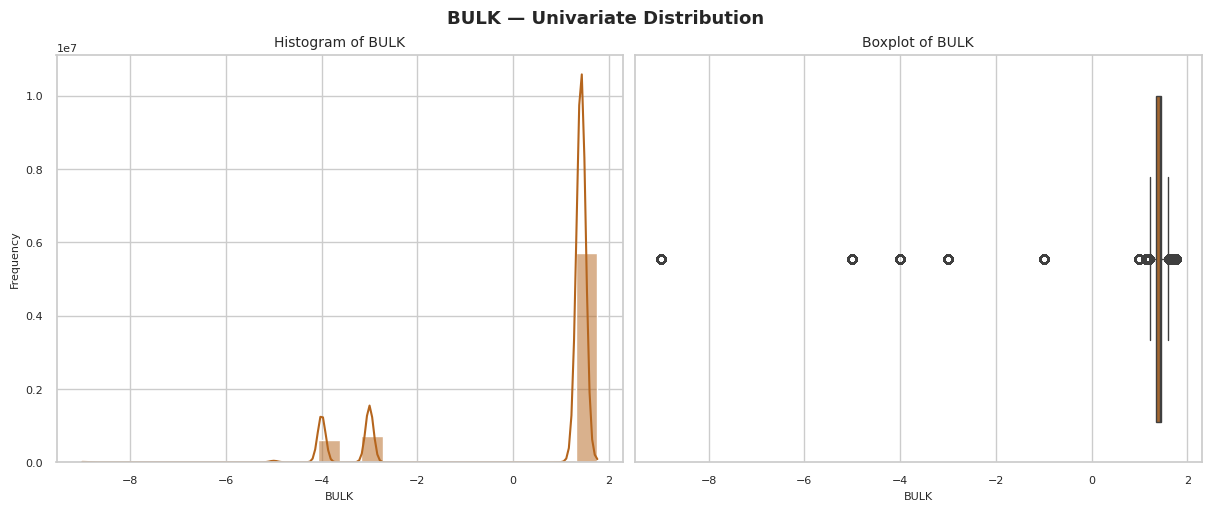


🌱  Univariate analysis for 'REF_BULK'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     1.657159e+00
std      9.204897e-02
min      1.200000e+00
25%      1.610000e+00
50%      1.650000e+00
75%      1.710000e+00
max      2.040000e+00
Name: REF_BULK, dtype: float64

🚨 Outliers: 167233 (2.90%)
   - Low outliers:  71533
   - High outliers: 95700


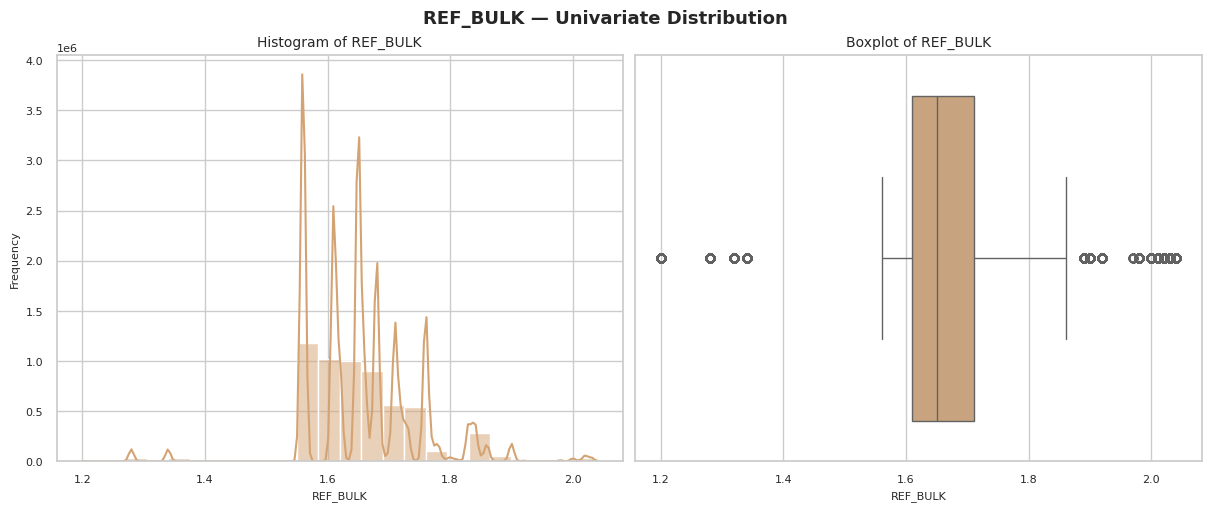


🌱  Univariate analysis for 'ORG_CARBON'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean    -5.300167e-02
std      1.725478e+00
min     -9.000000e+00
25%      5.450000e-01
50%      6.160000e-01
75%      7.110000e-01
max      7.326000e+00
Name: ORG_CARBON, dtype: float64

🚨 Outliers: 1894400 (26.63%)
   - Low outliers:  1409634
   - High outliers: 484766


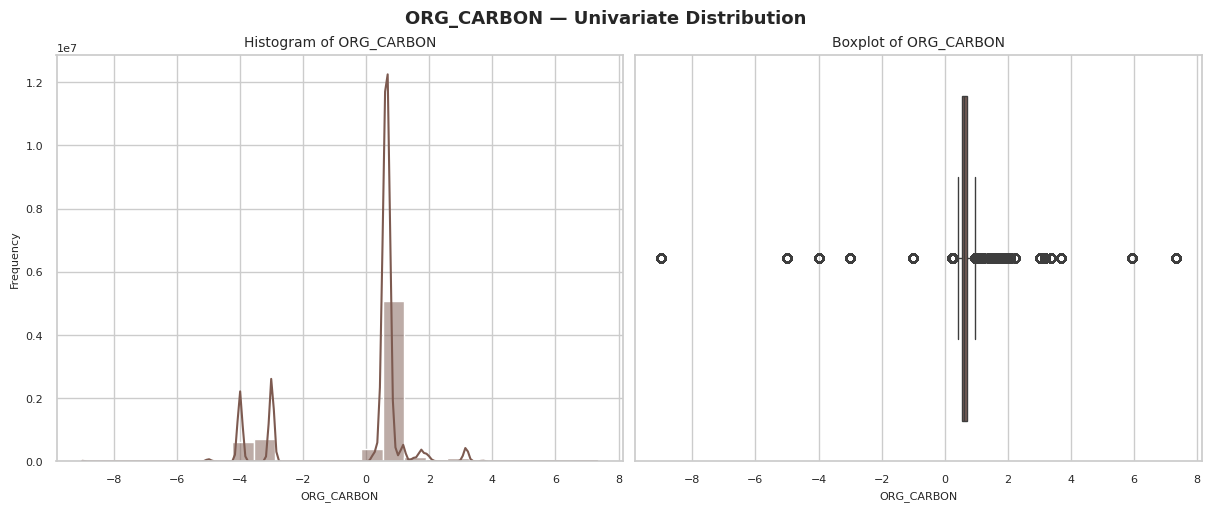


🌱  Univariate analysis for 'PH_WATER'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     5.619307e+00
std      4.418192e+00
min     -9.000000e+00
25%      7.400000e+00
50%      7.400000e+00
75%      8.100000e+00
max      8.600000e+00
Name: PH_WATER, dtype: float64

🚨 Outliers: 1428047 (20.08%)
   - Low outliers:  1428047
   - High outliers: 0


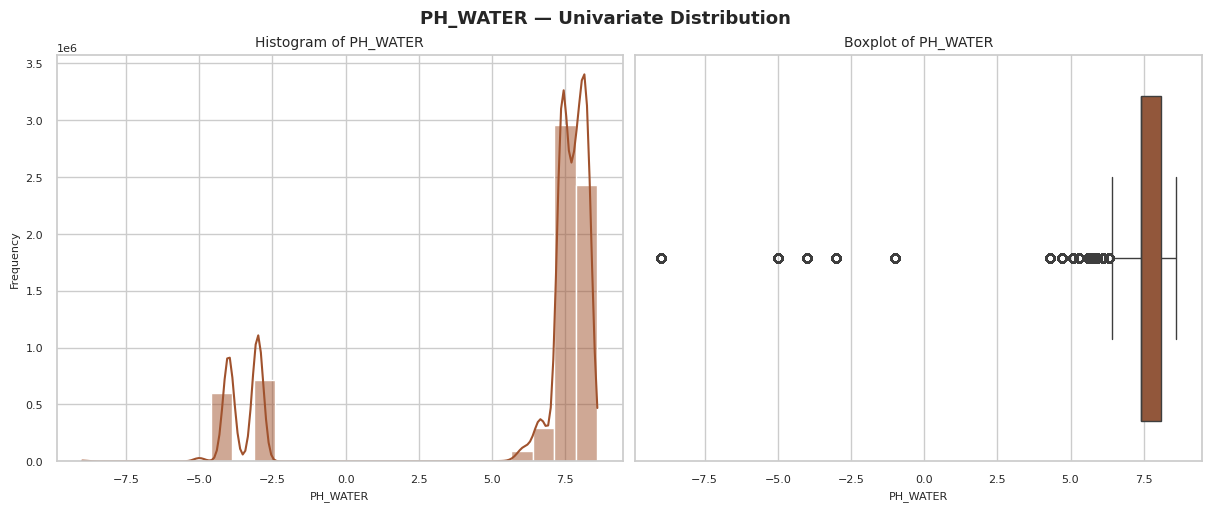


🌱  Univariate analysis for 'TOTAL_N'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean    -5.554700e-02
std      1.693427e+00
min     -9.000000e+00
25%      5.200000e-01
50%      6.000000e-01
75%      7.800000e-01
max      3.690000e+00
Name: TOTAL_N, dtype: float64

🚨 Outliers: 1698729 (23.88%)
   - Low outliers:  1339532
   - High outliers: 359197


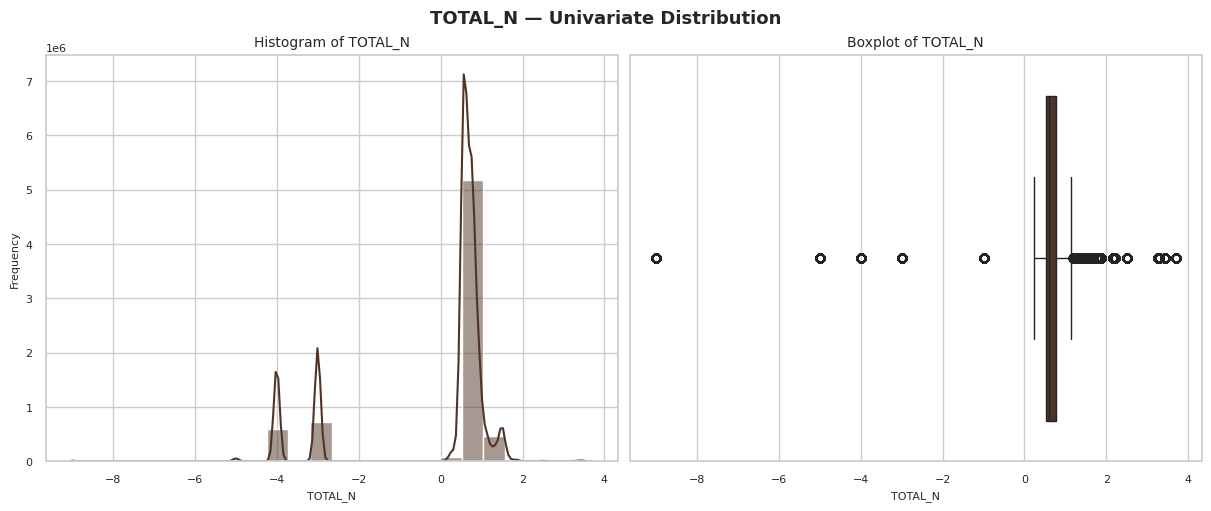


🌱  Univariate analysis for 'CN_RATIO'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     7.726736e+00
std      5.600687e+00
min     -9.000000e+00
25%      9.000000e+00
50%      9.000000e+00
75%      1.100000e+01
max      2.400000e+01
Name: CN_RATIO, dtype: float64

🚨 Outliers: 1341000 (18.85%)
   - Low outliers:  1339532
   - High outliers: 1468


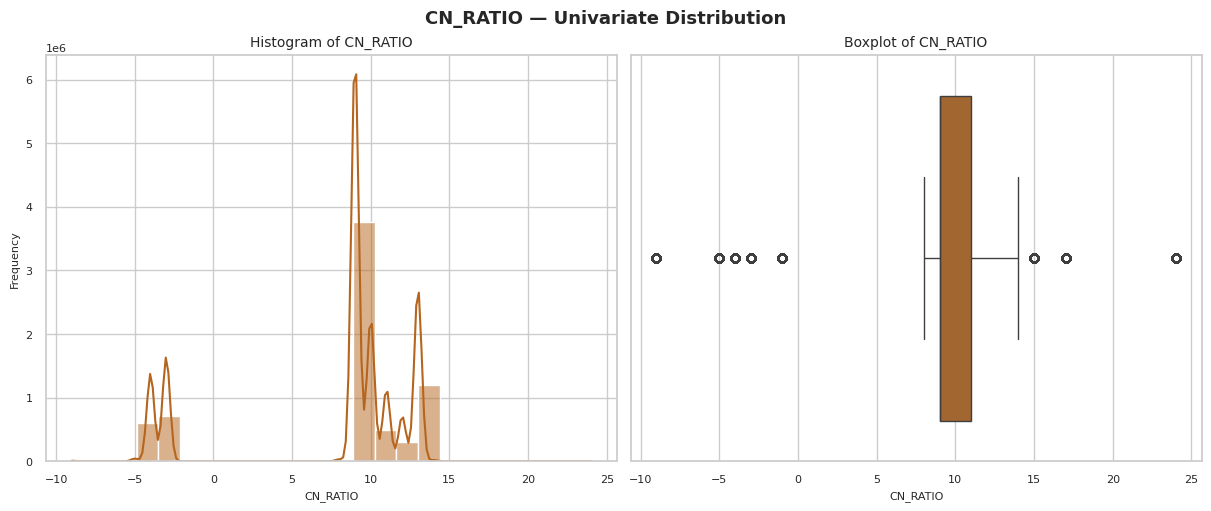


🌱  Univariate analysis for 'CEC_SOIL'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     9.382530e+00
std      7.390889e+00
min     -9.000000e+00
25%      6.000000e+00
50%      1.300000e+01
75%      1.400000e+01
max      4.100000e+01
Name: CEC_SOIL, dtype: float64

🚨 Outliers: 51827 (0.73%)
   - Low outliers:  4149
   - High outliers: 47678


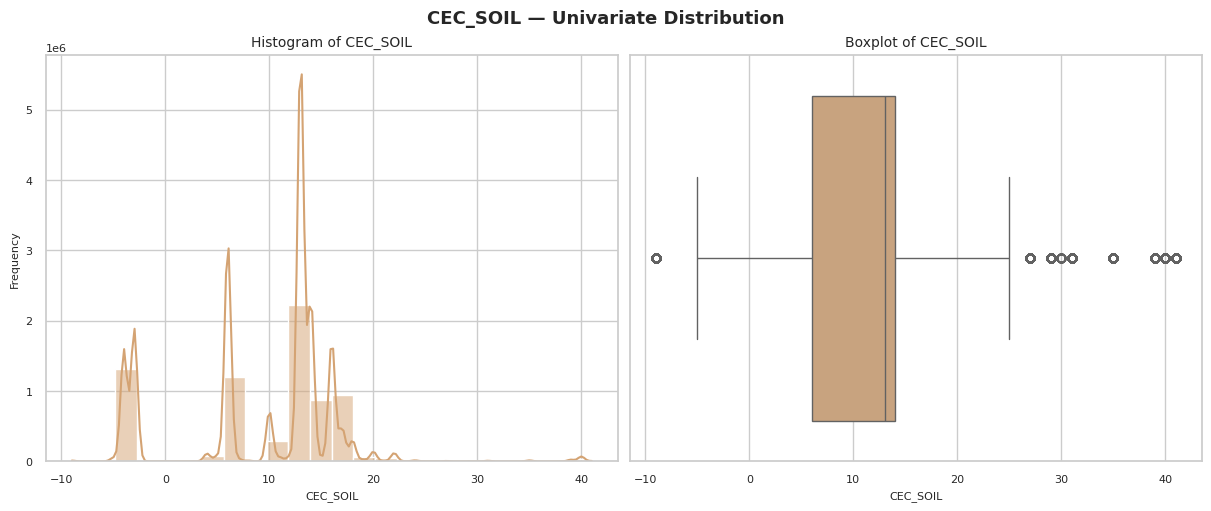


🌱  Univariate analysis for 'CEC_CLAY'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     4.704939e+01
std      2.856806e+01
min     -9.000000e+00
25%      3.500000e+01
50%      5.000000e+01
75%      7.400000e+01
max      8.300000e+01
Name: CEC_CLAY, dtype: float64

🚨 Outliers: 0 (0.00%)


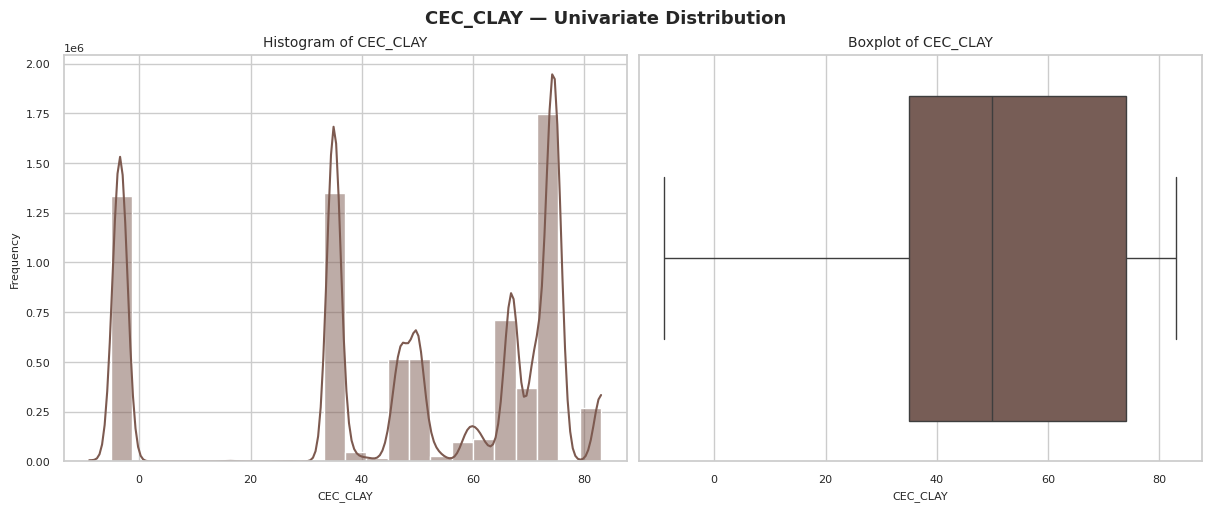


🌱  Univariate analysis for 'CEC_EFF'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     2.827078e+01
std      2.444025e+01
min     -9.000000e+00
25%      2.000000e+01
50%      2.500000e+01
75%      3.700000e+01
max      1.430000e+02
Name: CEC_EFF, dtype: float64

🚨 Outliers: 764520 (10.75%)
   - Low outliers:  4149
   - High outliers: 760371


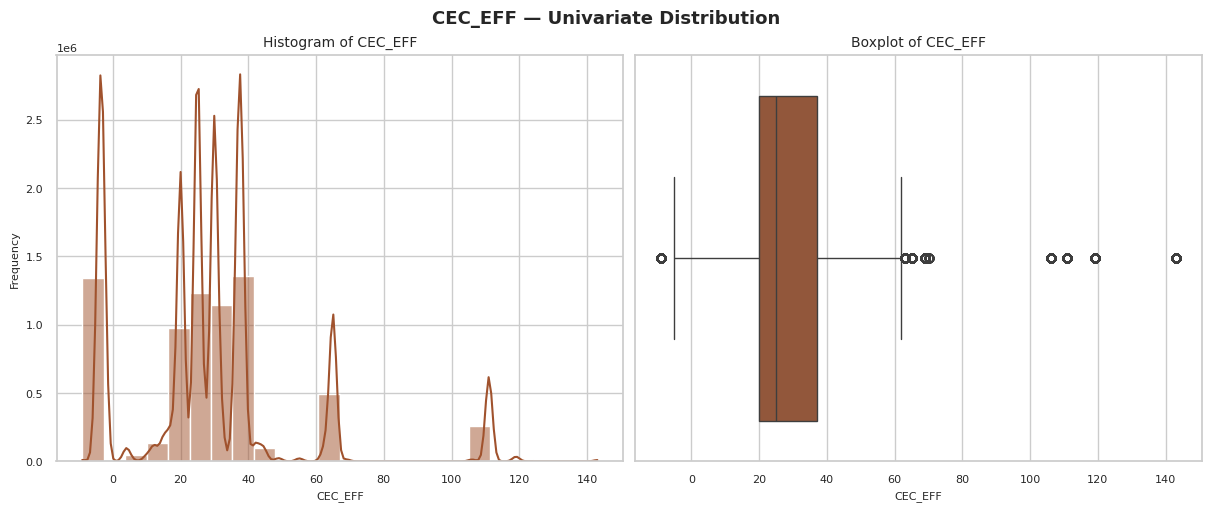


🌱  Univariate analysis for 'TEB'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     2.555996e+01
std      2.536351e+01
min     -9.000000e+00
25%      1.000000e+01
50%      2.000000e+01
75%      3.800000e+01
max      1.430000e+02
Name: TEB, dtype: float64

🚨 Outliers: 278086 (3.91%)
   - Low outliers:  0
   - High outliers: 278086


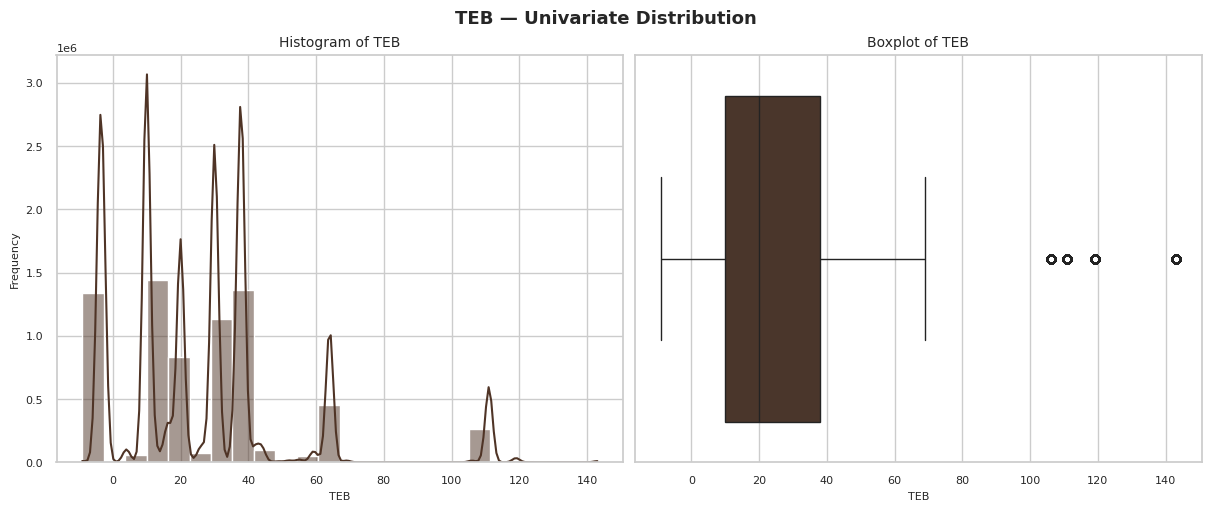


🌱  Univariate analysis for 'BSAT'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     7.272095e+01
std      3.905418e+01
min     -9.000000e+00
25%      6.400000e+01
50%      9.800000e+01
75%      1.000000e+02
max      1.000000e+02
Name: BSAT, dtype: float64

🚨 Outliers: 1339532 (18.83%)
   - Low outliers:  1339532
   - High outliers: 0


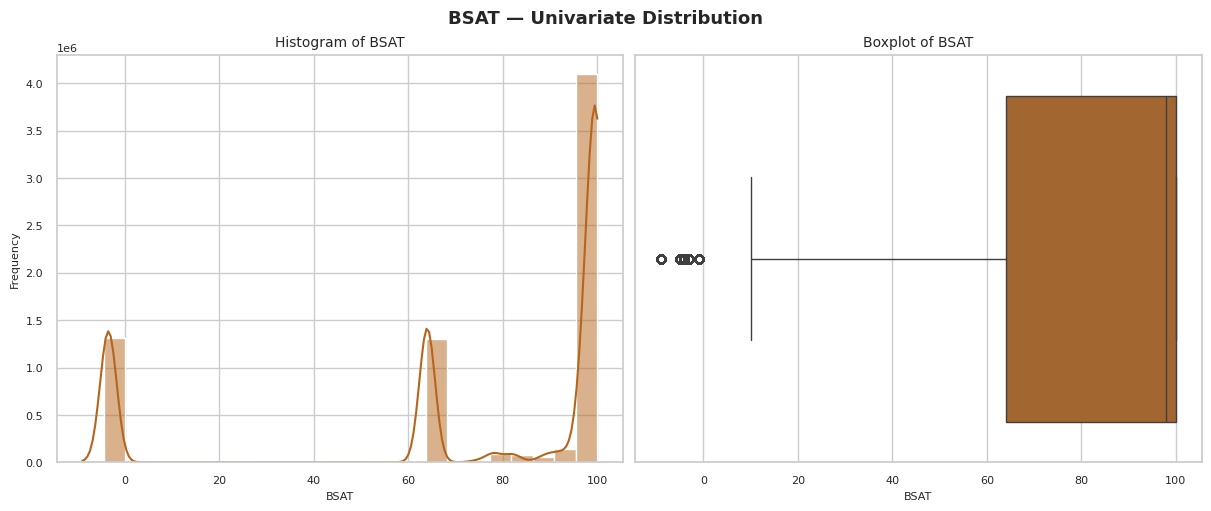


🌱  Univariate analysis for 'ALUM_SAT'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean    -6.150882e-01
std      1.638642e+00
min     -9.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+01
Name: ALUM_SAT, dtype: float64

🚨 Outliers: 1361965 (19.15%)
   - Low outliers:  1339532
   - High outliers: 22433


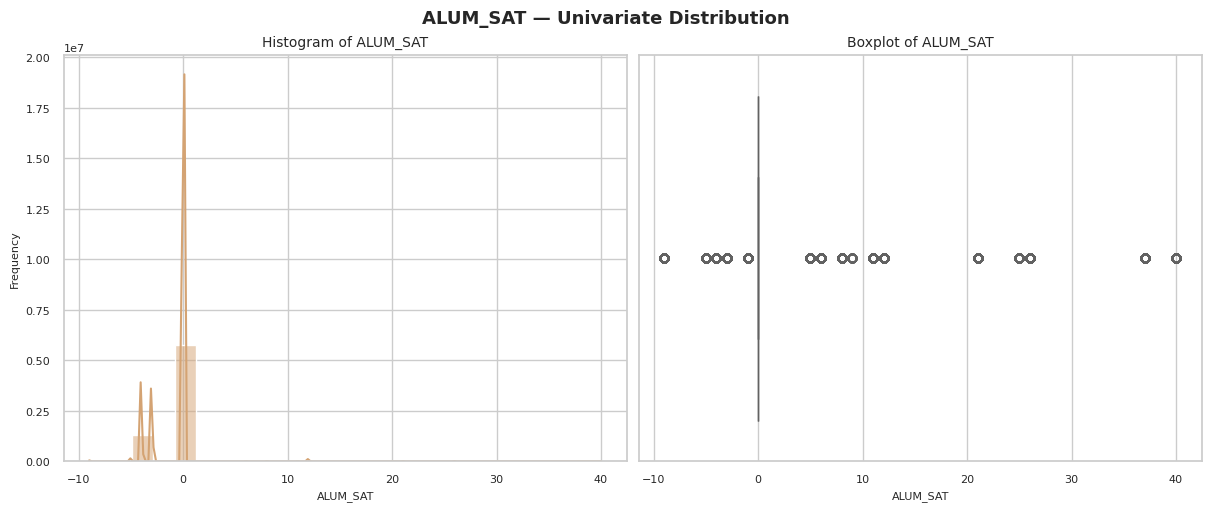


🌱  Univariate analysis for 'ESP'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     5.221174e+00
std      1.254522e+01
min     -9.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      3.000000e+00
max      6.700000e+01
Name: ESP, dtype: float64

🚨 Outliers: 2312648 (32.51%)
   - Low outliers:  1339532
   - High outliers: 973116


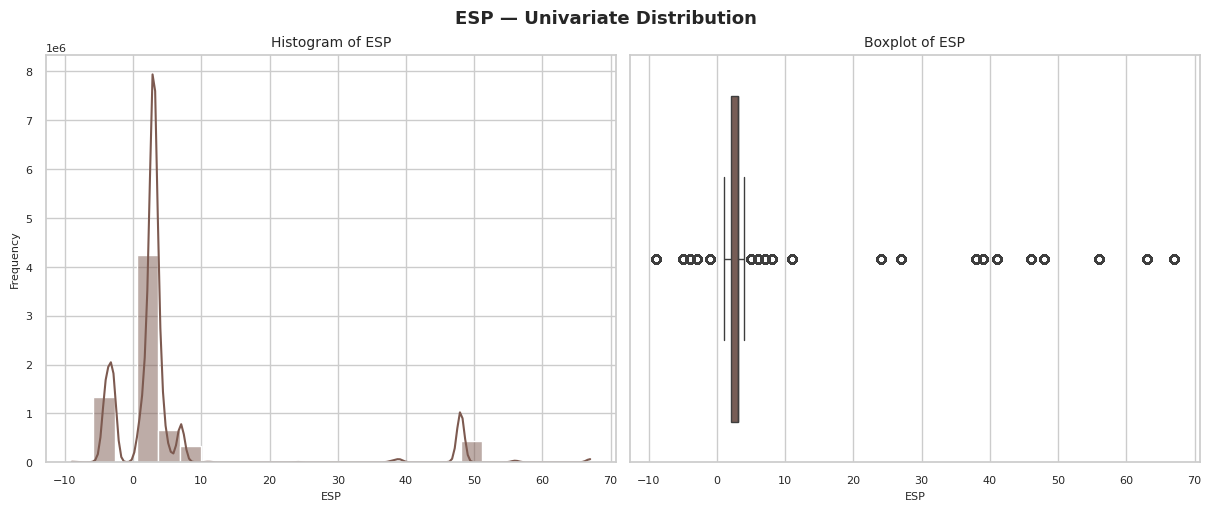


🌱  Univariate analysis for 'TCARBON_EQ'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     6.143068e+00
std      6.376713e+00
min     -9.000000e+00
25%      1.800000e+00
50%      6.300000e+00
75%      1.130000e+01
max      3.130000e+01
Name: TCARBON_EQ, dtype: float64

🚨 Outliers: 6334 (0.09%)
   - Low outliers:  0
   - High outliers: 6334


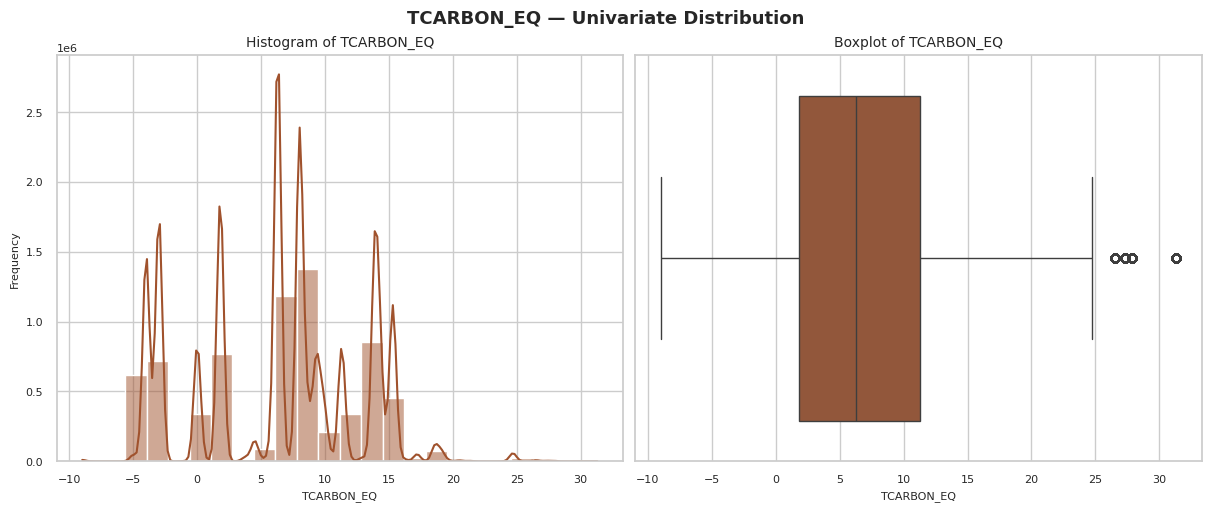


🌱  Univariate analysis for 'GYPSUM'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     2.703663e+00
std      8.189012e+00
min     -9.000000e+00
25%      2.000000e-01
50%      3.000000e-01
75%      4.000000e+00
max      5.760000e+01
Name: GYPSUM, dtype: float64

🚨 Outliers: 327489 (4.60%)
   - Low outliers:  4149
   - High outliers: 323340


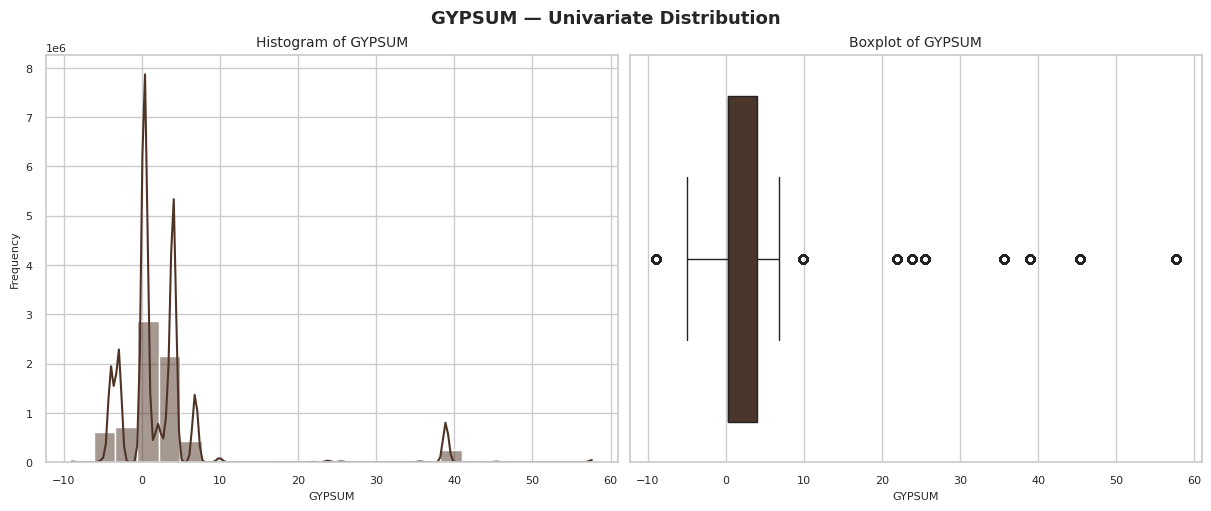


🌱  Univariate analysis for 'ELEC_COND'
------------------------------------------------------------
📊 Summary statistics:
count    7.113536e+06
mean     1.196204e+00
std      4.110687e+00
min     -9.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.200000e+01
Name: ELEC_COND, dtype: float64

🚨 Outliers: 2712749 (38.14%)
   - Low outliers:  1473146
   - High outliers: 1239603


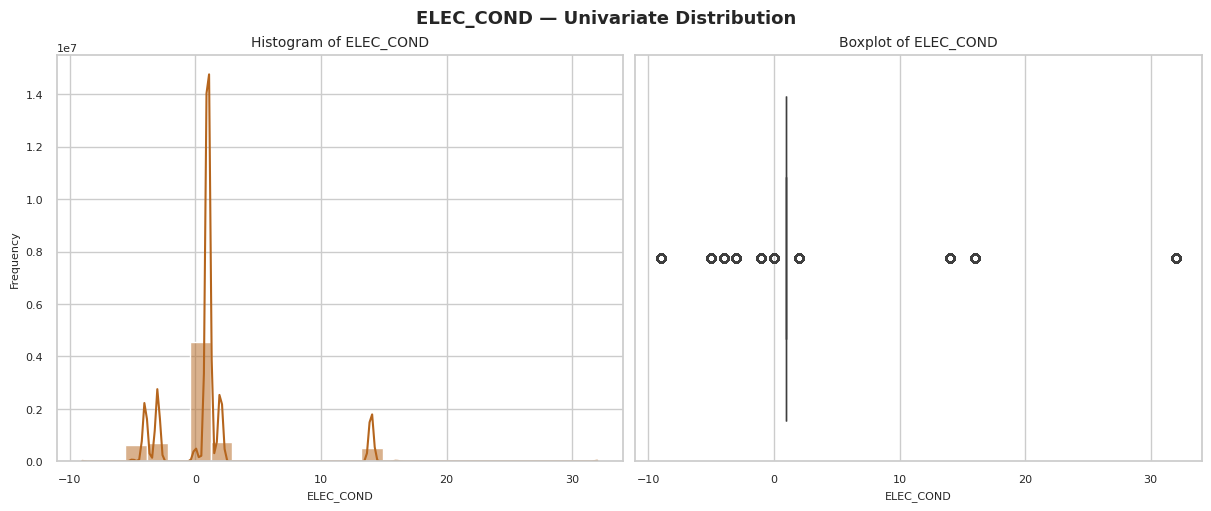

In [ ]:

earth_colors = ["#a67b5b", "#c2b280", "#8b5a2b", "#deb887", "#b5651d", "#7b3f00"]

# Categorical columns
for i, col in enumerate(categorical_cols):
    plot_univariate_distribution(col, "categorical", color_key=list(EARTH_COLORS.keys())[i % len(EARTH_COLORS)])

# Numerical columns
for i, col in enumerate(numerical_cols):
    plot_univariate_distribution(col, "numerical", color_key=list(EARTH_COLORS.keys())[i % len(EARTH_COLORS)])



In [22]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import os

def plot_all_soil_maps(soil_df, numerical_cols, categorical_cols, lon_col="LONGITUDE", lat_col="LATITUDE",
                       n_cols=2, cmap="terrain", save_dir=None):
    """
    Plots spatial maps of soil properties using lat/lon coordinates.
    - Numerical columns use a colorbar.
    - Categorical columns use discrete colors (legend).
    """

    # Convert to GeoDataFrame
    gdf = gpd.GeoDataFrame(
        soil_df,
        geometry=gpd.points_from_xy(soil_df[lon_col], soil_df[lat_col]),
        crs="EPSG:4326"
    )

    total_cols = numerical_cols + categorical_cols
    n_rows = (len(total_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 6 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(total_cols):
        ax = axes[i]
        ax.set_title(col, fontsize=12)

        if col in numerical_cols:
            # Plot numerical with colorbar
            sc = ax.scatter(
                gdf[lon_col], gdf[lat_col],
                c=gdf[col],
                cmap=cmap,
                s=10,
                alpha=0.7
            )
            plt.colorbar(sc, ax=ax, orientation="vertical", shrink=0.8)
        else:
            # Plot categorical with discrete palette
            unique_vals = gdf[col].dropna().unique()
            palette = sns.color_palette("Set2", len(unique_vals))
            for val, color in zip(unique_vals, palette):
                subset = gdf[gdf[col] == val]
                ax.scatter(subset[lon_col], subset[lat_col],
                           color=color, label=str(val), s=10, alpha=0.7)
            ax.legend(title=col, loc="best", fontsize=8)

        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")

        if save_dir:
            os.makedirs(save_dir, exist_ok=True)
            plt.savefig(os.path.join(save_dir, f"map_{col}.png"), dpi=300, bbox_inches="tight")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
categorical_cols = ['TEXTURE_USDA', 'TEXTURE_SOTER']
numerical_cols = [
    'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK', 'REF_BULK', 'ORG_CARBON',
    'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF',
    'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND'
]

plot_all_soil_maps(
    soil_df,
    numerical_cols,
    categorical_cols,
    lon_col="longitude",
    lat_col="latitude",
    n_cols=2,
    cmap="terrain",   # or try "earth" / "YlOrBr"
    save_dir="Images_dir"
)


## Bivariate Analysis

In [6]:
def bivariate_analysis(df, col1, col2, type1, type2, max_points=5000):
    """
    Perform bivariate analysis depending on variable types.
    type1 and type2 ∈ {"numerical", "categorical"}.
    
    - numerical–numerical → scatter plot + Q–Q plot + correlations
    - numerical–categorical → boxplot + t-test if applicable
    - categorical–categorical → Chi-square test
    """

    data = df[[col1, col2]].dropna()
    # if len(data) > max_points:
    #     data = data.sample(max_points, random_state=42)

    print(f"\n🌿 Bivariate analysis: {col1} ({type1}) vs {col2} ({type2})")
    print("------------------------------------------------------------")

    # === 1️⃣ NUM–NUM ===
    if type1 == "numerical" and type2 == "numerical":
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Scatter plot
        sns.scatterplot(data=data, x=col1, y=col2, alpha=0.6, ax=axes[0])
        axes[0].set_title(f"Scatter Plot: {col1} vs {col2}")

        # Q–Q plot (normality check for col1)
        stats.probplot(data[col1].dropna(), dist="norm", plot=axes[1])
        axes[1].set_title(f"Q–Q Plot of {col1}")

        plt.tight_layout()
        plt.savefig(os.path.join(Images_dir, f"soil_{col1}_{col2}_scatter_qq_plots.png"), dpi=300, bbox_inches='tight')
        plt.show()

        # Correlation
        pearson_corr, _ = stats.pearsonr(data[col1], data[col2])
        spearman_corr, _ = stats.spearmanr(data[col1], data[col2])
        print(f"📈 Pearson correlation: {pearson_corr:.3f}")
        print(f"📊 Spearman correlation: {spearman_corr:.3f}")

    # === 2️⃣ NUM–CAT ===
    elif (type1 == "numerical" and type2 == "categorical") or (type1 == "categorical" and type2 == "numerical"):
        num_col = col1 if type1 == "numerical" else col2
        cat_col = col2 if type2 == "categorical" else col1

        fig, ax = plt.subplots(figsize=(8, 5))
        sns.boxplot(data=data, x=cat_col, y=num_col, ax=ax)
        ax.set_title(f"Boxplot: {num_col} by {cat_col}")
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.savefig(os.path.join(Images_dir, f"soil_{num_col}_by_{cat_col}_boxplot.png"), dpi=300, bbox_inches='tight')
        plt.show()

        # T-test (only for 2 categories)
        unique_vals = data[cat_col].unique()
        if len(unique_vals) == 2:
            group1 = data[data[cat_col] == unique_vals[0]][num_col]
            group2 = data[data[cat_col] == unique_vals[1]][num_col]
            t_stat, p_value = stats.ttest_ind(group1, group2)
            print(f"🧪 T-test ({unique_vals[0]} vs {unique_vals[1]}): t = {t_stat:.3f}, p = {p_value:.4f}")
        else:
            print("⚠️ More than 2 categories — skipping t-test.")

    # === 3️⃣ CAT–CAT ===
    elif type1 == "categorical" and type2 == "categorical":
        contingency = pd.crosstab(data[col1], data[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contingency)
        print(f"🧩 Chi-square test: χ² = {chi2:.3f}, p = {p:.4f}, dof = {dof}")
        print("Contingency table:\n", contingency)

    print("------------------------------------------------------------")


In [7]:
from itertools import combinations

categorical_cols = ['TEXTURE_USDA', 'TEXTURE_SOTER']
numerical_cols = [
    'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK', 'REF_BULK', 'ORG_CARBON',
    'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF',
    'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND'
]


🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs TEXTURE_SOTER (categorical)
------------------------------------------------------------
🧩 Chi-square test: χ² = 5261168.303, p = 0.0000, dof = 12
Contingency table:
 TEXTURE_SOTER        C      F        M
TEXTURE_USDA                          
3.0                  0  41310        0
5.0                  0  53615   276683
7.0                  0      0     1418
9.0                  0      0  2052079
10.0                 0      0    33606
11.0           1929401      0  1314890
12.0             71002      0        0
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs SAND (numerical)
------------------------------------------------------------


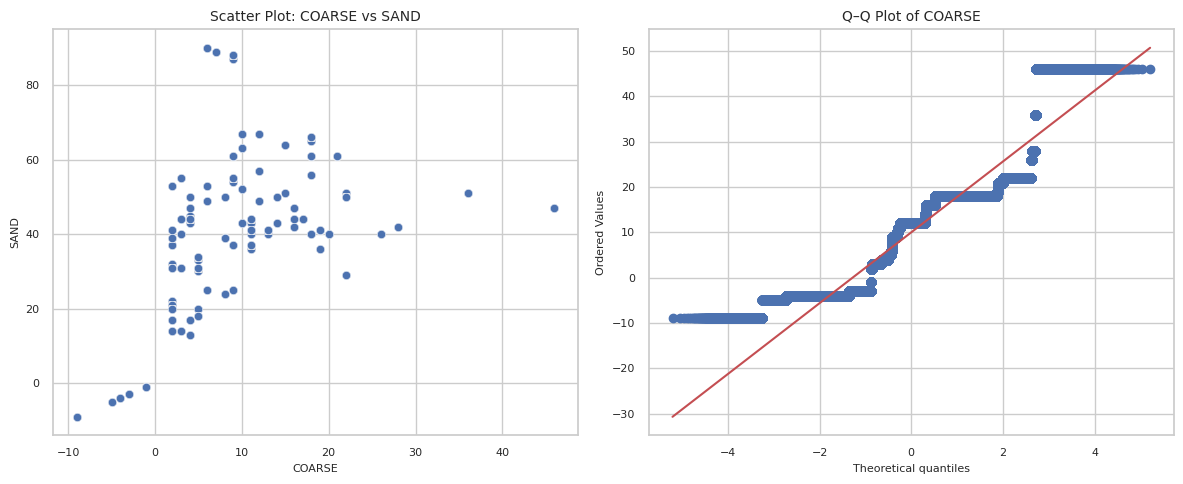

📈 Pearson correlation: 0.860
📊 Spearman correlation: 0.856
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs SILT (numerical)
------------------------------------------------------------


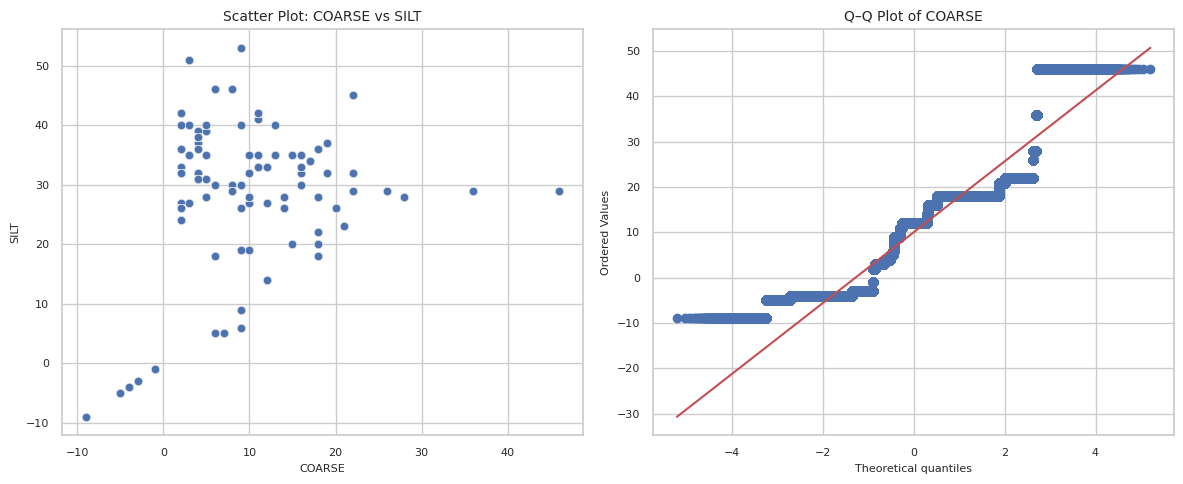

📈 Pearson correlation: 0.519
📊 Spearman correlation: 0.070
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs CLAY (numerical)
------------------------------------------------------------


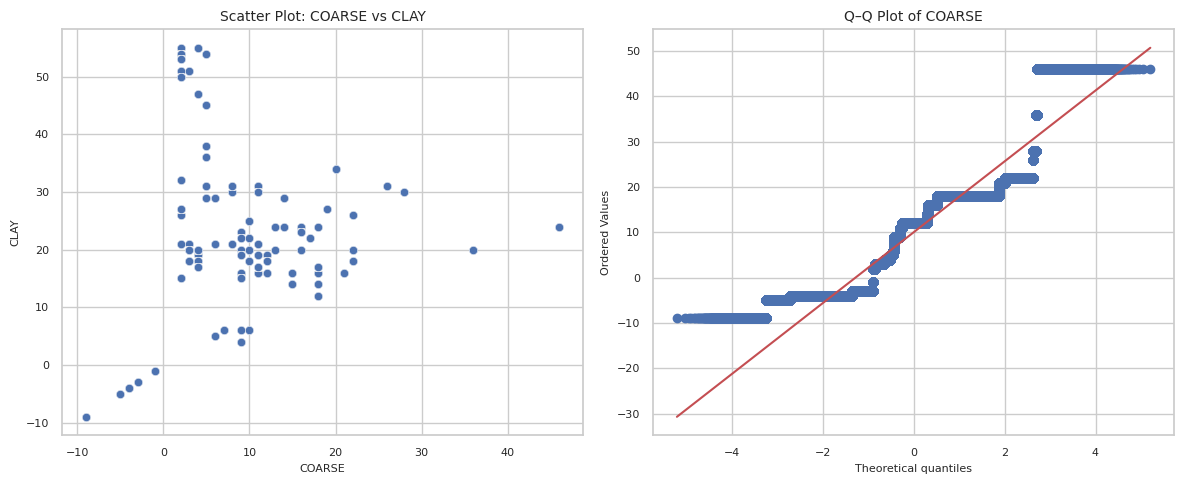

📈 Pearson correlation: 0.536
📊 Spearman correlation: 0.182
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs BULK (numerical)
------------------------------------------------------------


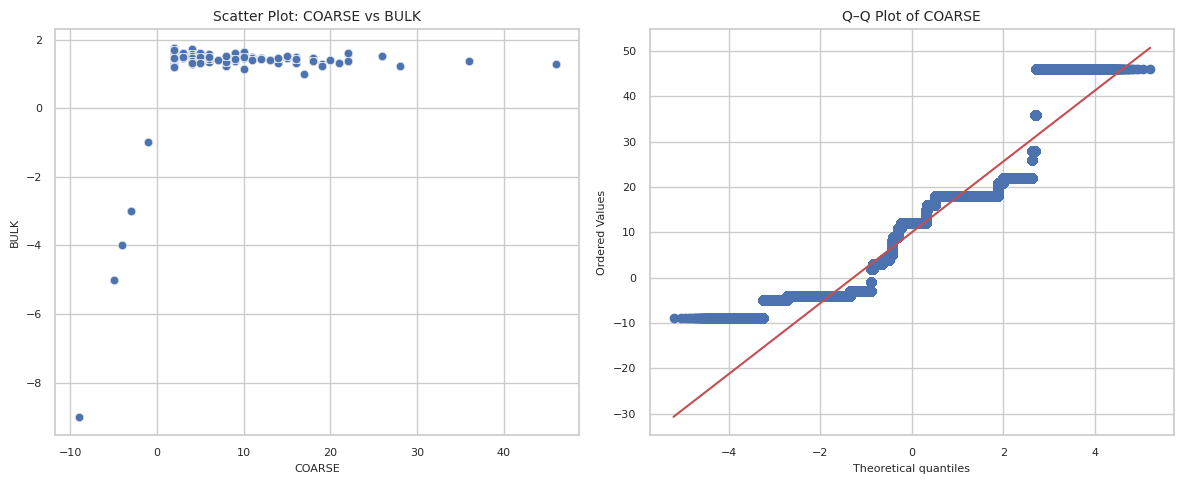

📈 Pearson correlation: 0.771
📊 Spearman correlation: 0.282
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs REF_BULK (numerical)
------------------------------------------------------------


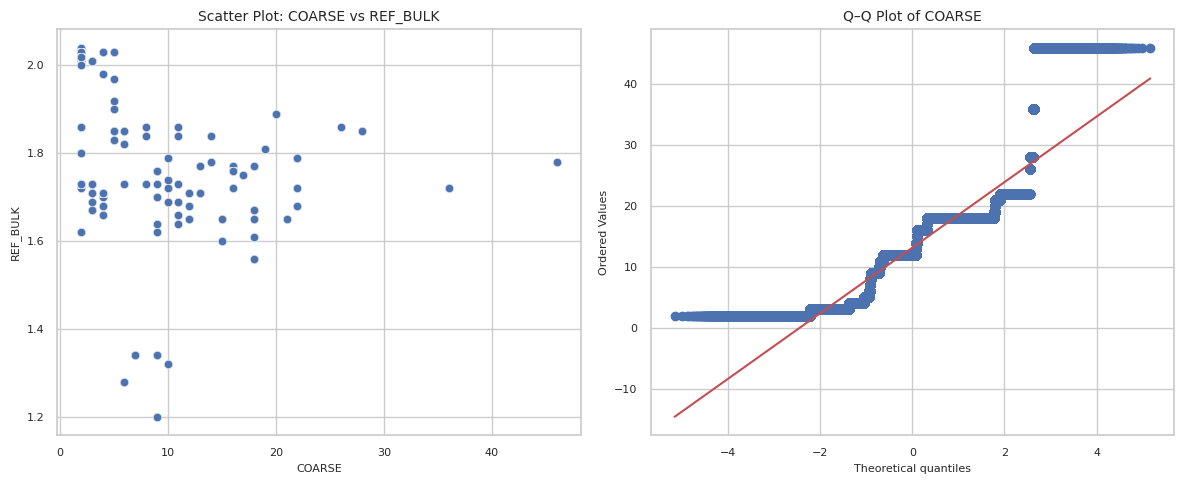

📈 Pearson correlation: -0.326
📊 Spearman correlation: -0.545
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs ORG_CARBON (numerical)
------------------------------------------------------------


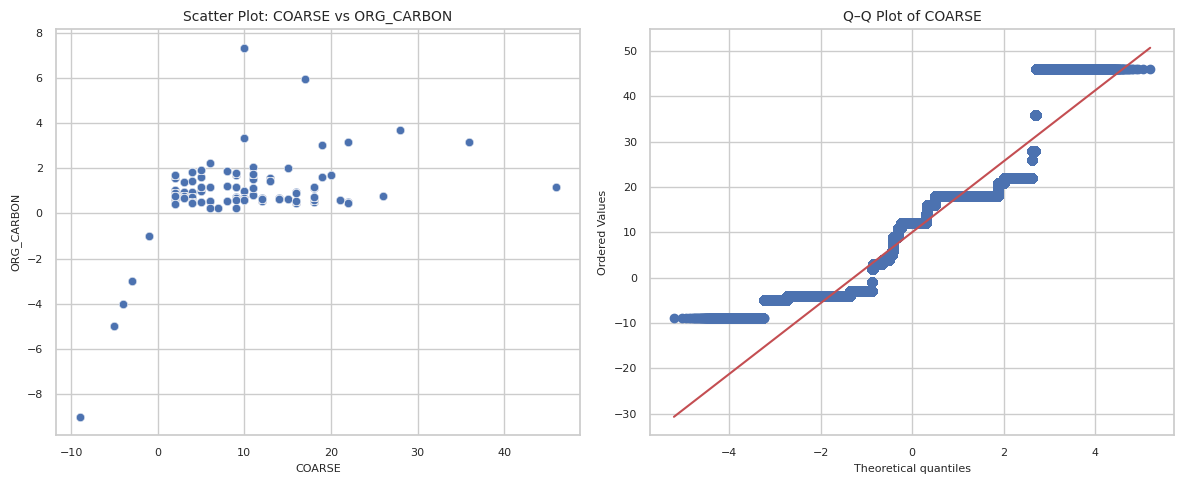

📈 Pearson correlation: 0.773
📊 Spearman correlation: 0.512
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs PH_WATER (numerical)
------------------------------------------------------------


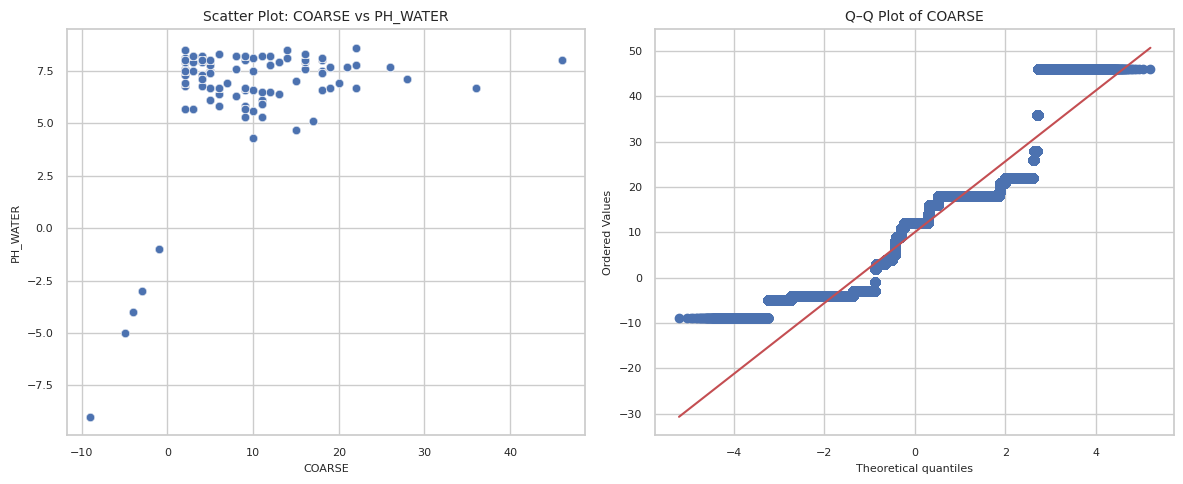

📈 Pearson correlation: 0.756
📊 Spearman correlation: 0.197
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs TOTAL_N (numerical)
------------------------------------------------------------


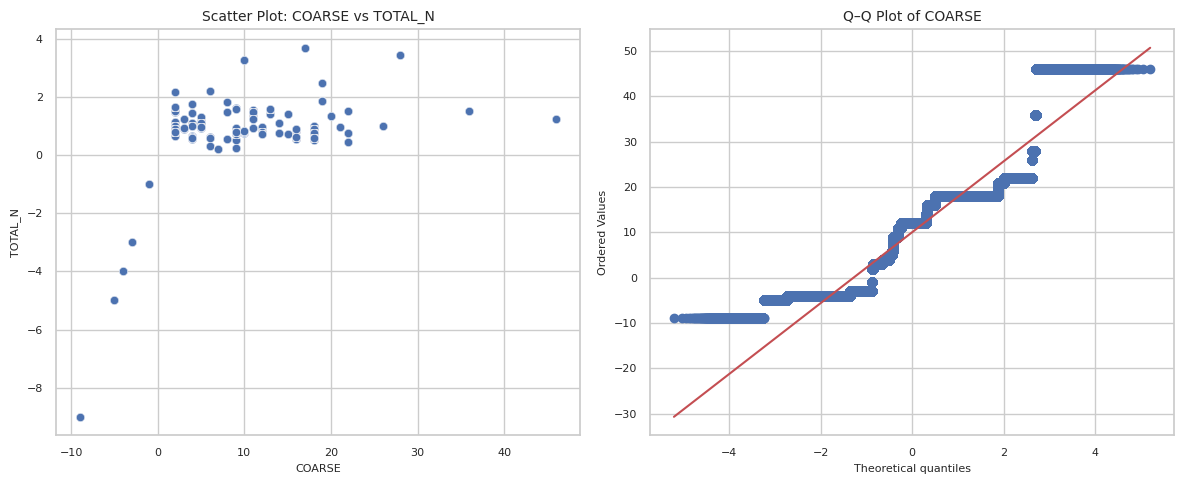

📈 Pearson correlation: 0.748
📊 Spearman correlation: 0.157
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs CN_RATIO (numerical)
------------------------------------------------------------


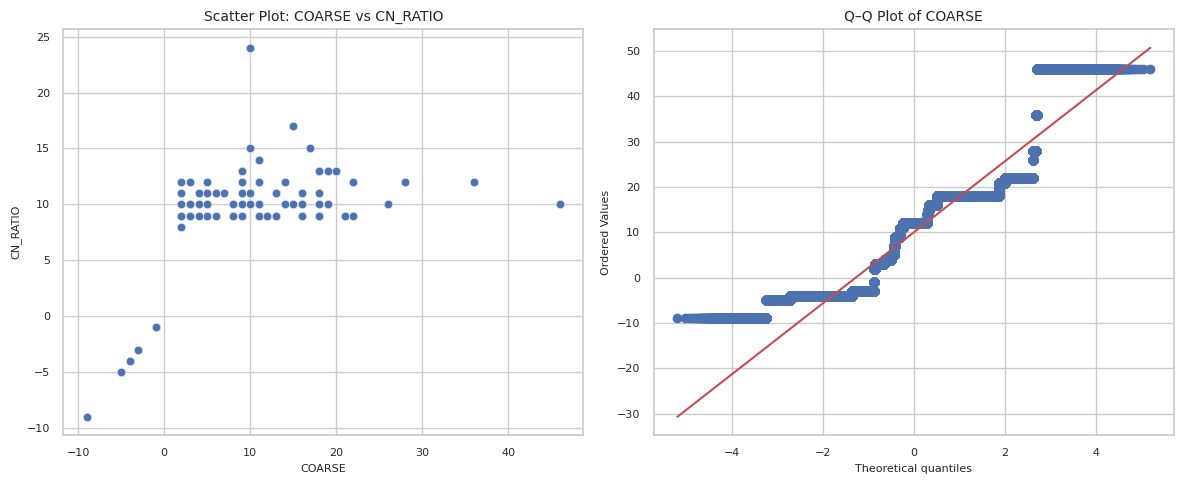

📈 Pearson correlation: 0.843
📊 Spearman correlation: 0.845
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs CEC_SOIL (numerical)
------------------------------------------------------------


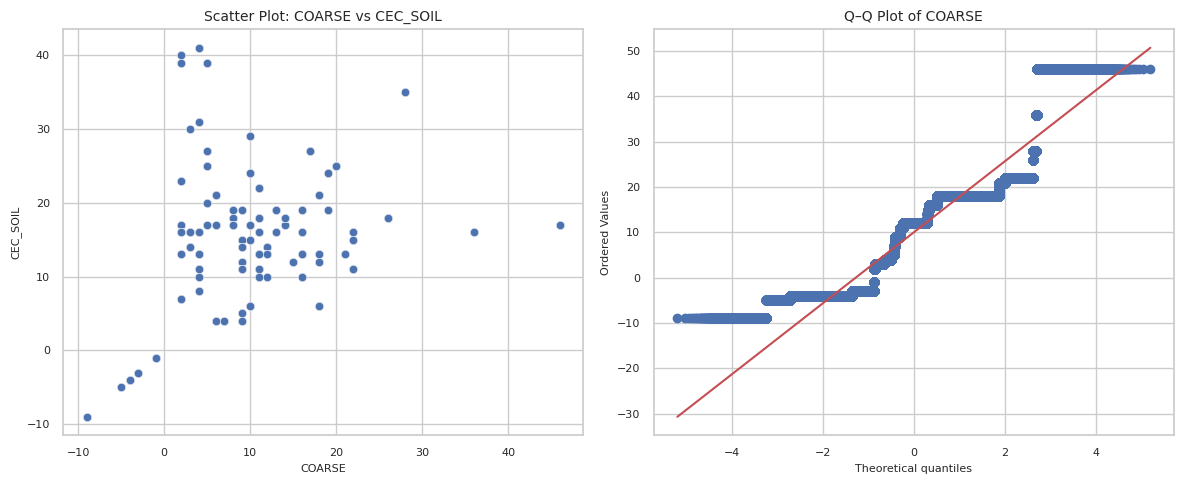

📈 Pearson correlation: 0.527
📊 Spearman correlation: 0.207
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs CEC_CLAY (numerical)
------------------------------------------------------------


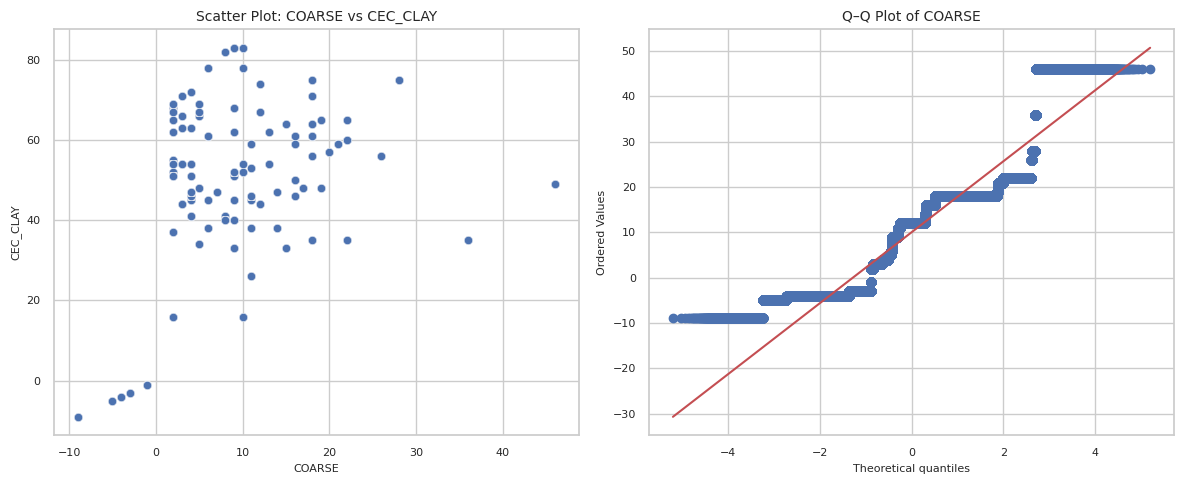

📈 Pearson correlation: 0.567
📊 Spearman correlation: 0.350
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs CEC_EFF (numerical)
------------------------------------------------------------


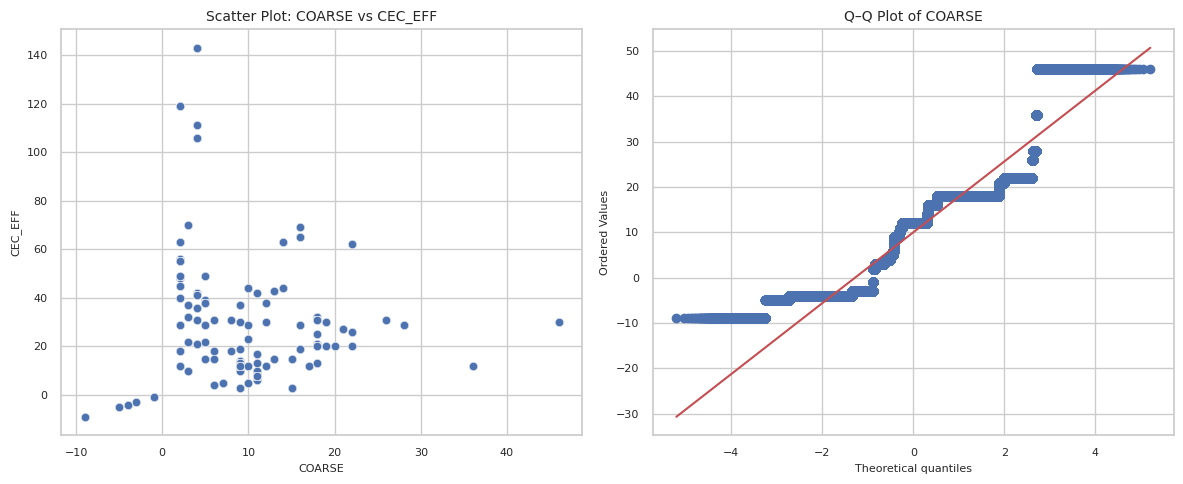

📈 Pearson correlation: 0.297
📊 Spearman correlation: 0.179
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs TEB (numerical)
------------------------------------------------------------


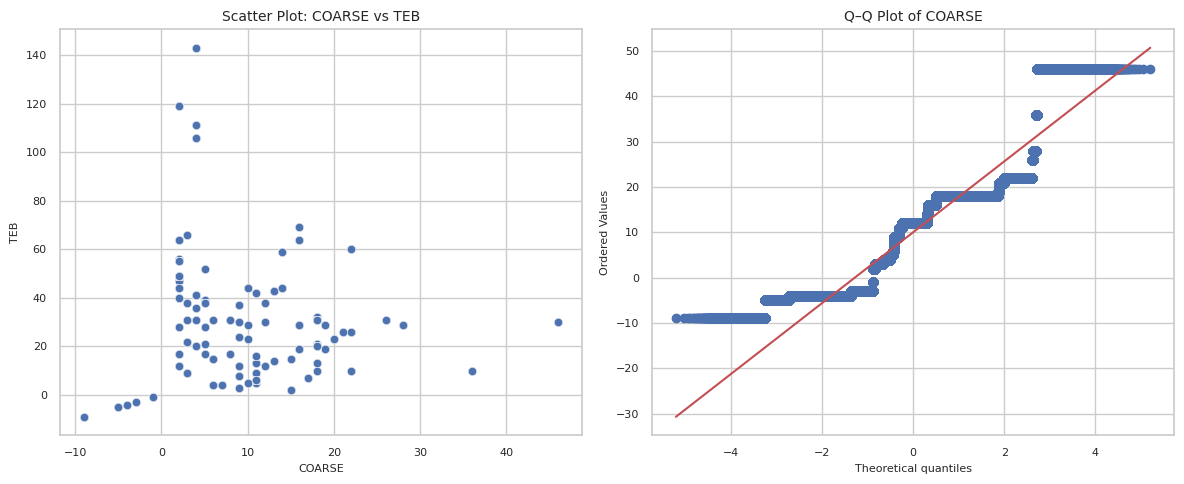

📈 Pearson correlation: 0.179
📊 Spearman correlation: 0.139
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs BSAT (numerical)
------------------------------------------------------------


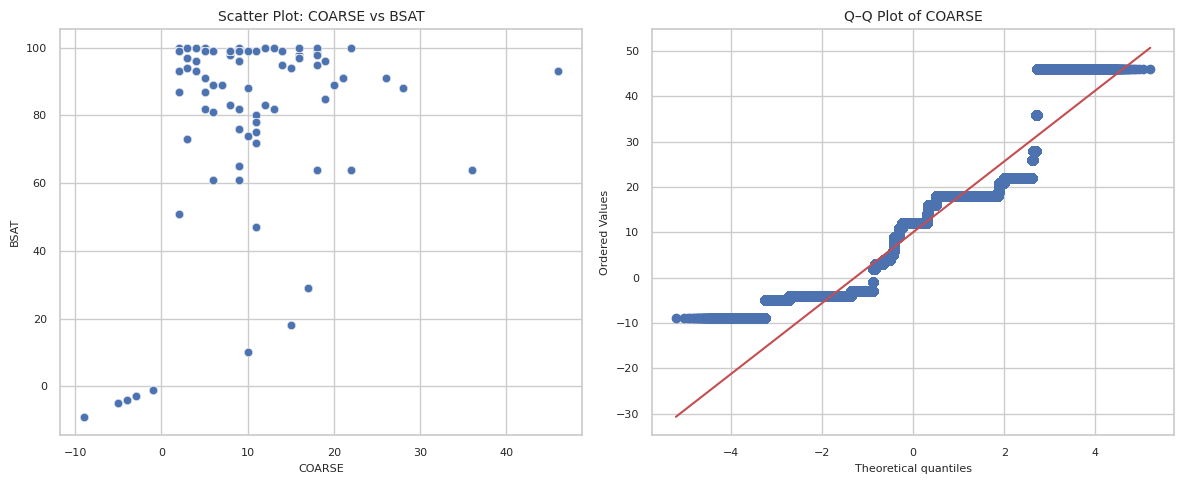

📈 Pearson correlation: 0.635
📊 Spearman correlation: 0.221
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs ALUM_SAT (numerical)
------------------------------------------------------------


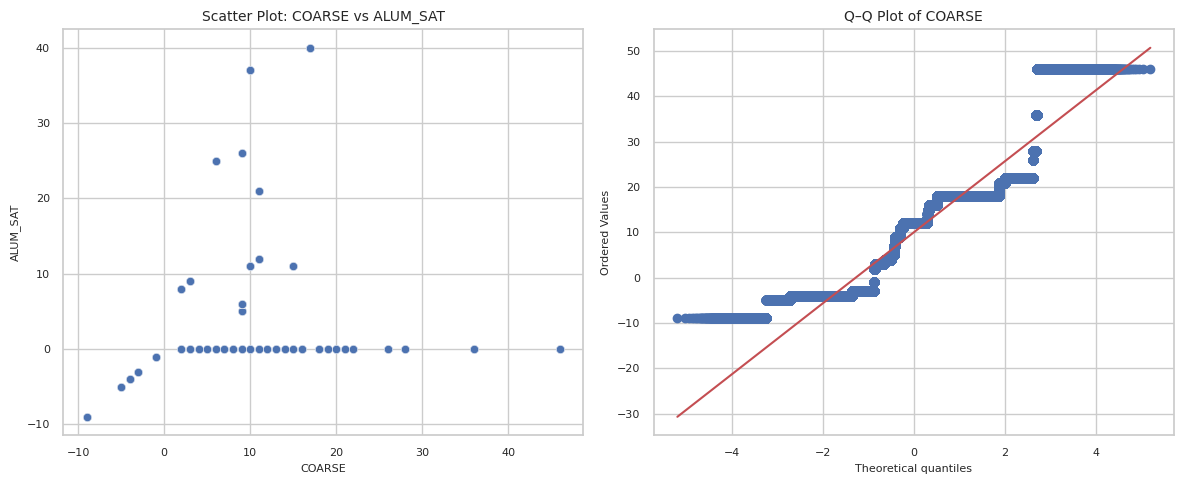

📈 Pearson correlation: 0.656
📊 Spearman correlation: 0.683
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs ESP (numerical)
------------------------------------------------------------


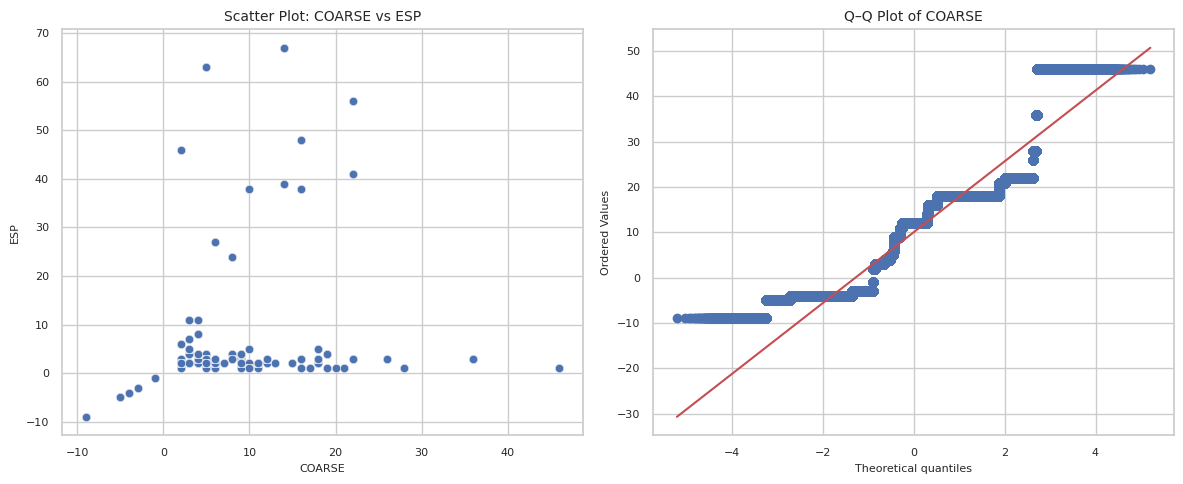

📈 Pearson correlation: 0.322
📊 Spearman correlation: 0.409
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs TCARBON_EQ (numerical)
------------------------------------------------------------


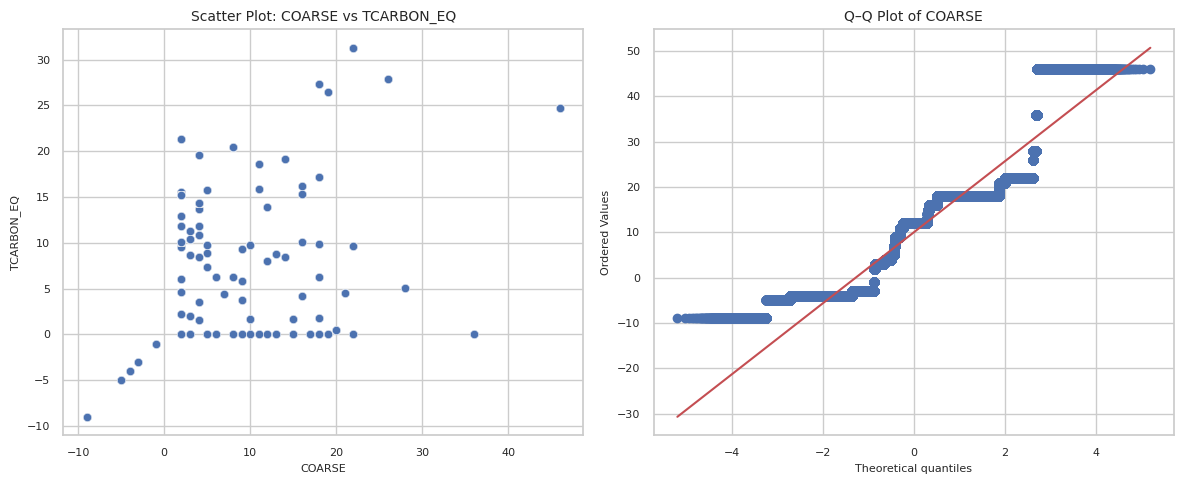

📈 Pearson correlation: 0.447
📊 Spearman correlation: 0.200
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs GYPSUM (numerical)
------------------------------------------------------------


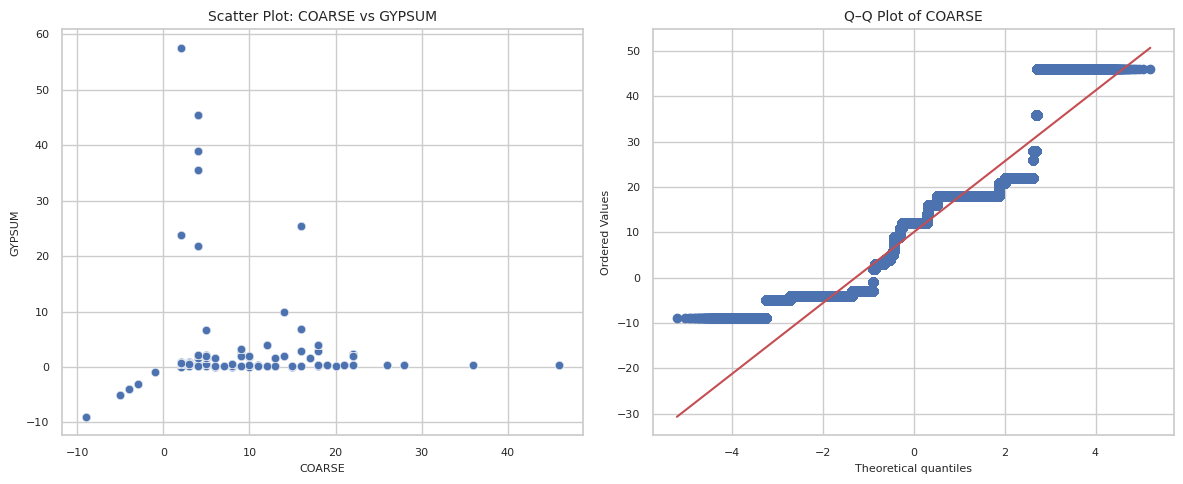

📈 Pearson correlation: 0.090
📊 Spearman correlation: 0.415
------------------------------------------------------------

🌿 Bivariate analysis: COARSE (numerical) vs ELEC_COND (numerical)
------------------------------------------------------------


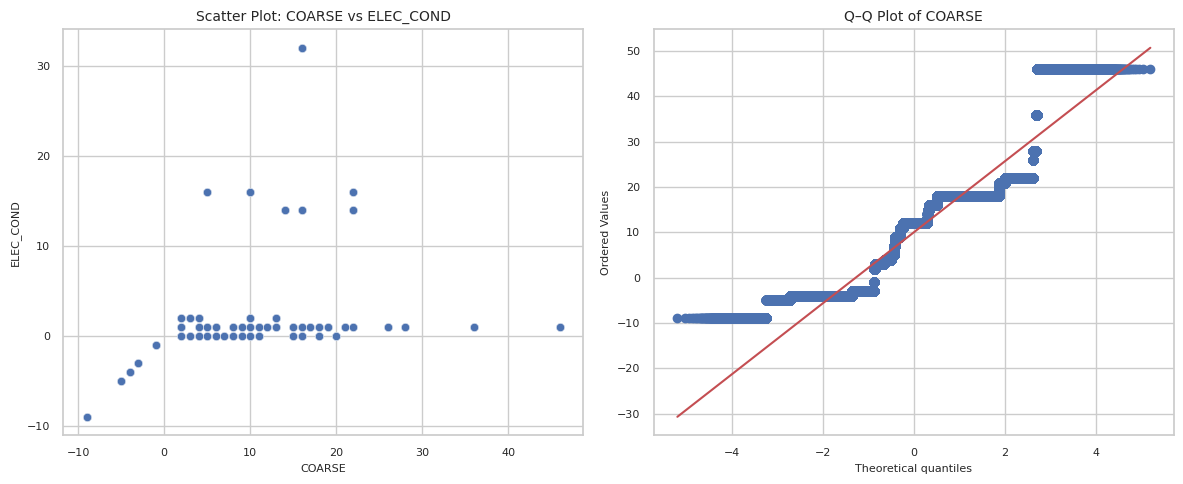

📈 Pearson correlation: 0.480
📊 Spearman correlation: 0.409
------------------------------------------------------------

🌿 Bivariate analysis: SAND (numerical) vs SILT (numerical)
------------------------------------------------------------


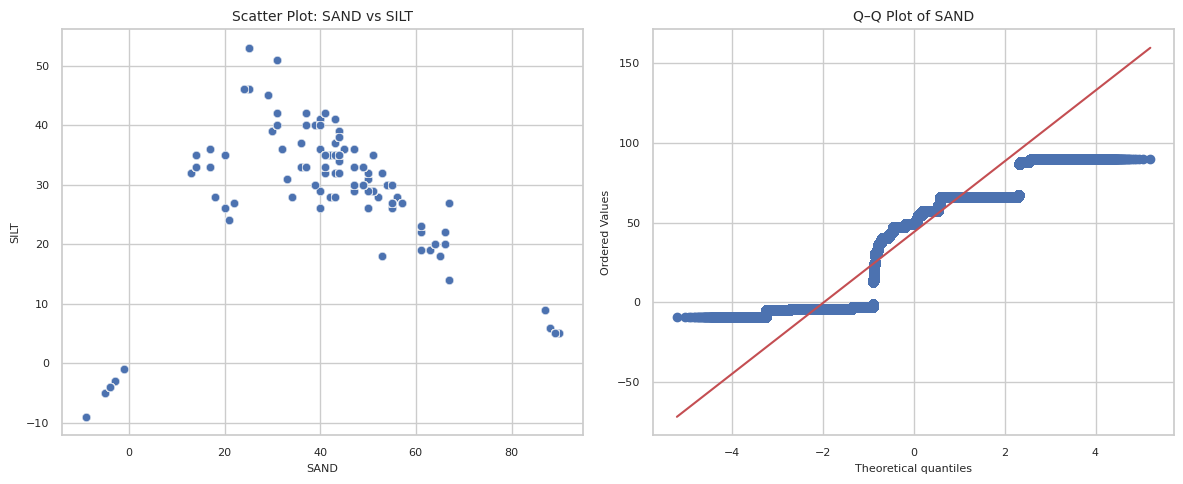

📈 Pearson correlation: 0.659
📊 Spearman correlation: -0.020
------------------------------------------------------------

🌿 Bivariate analysis: SAND (numerical) vs CLAY (numerical)
------------------------------------------------------------


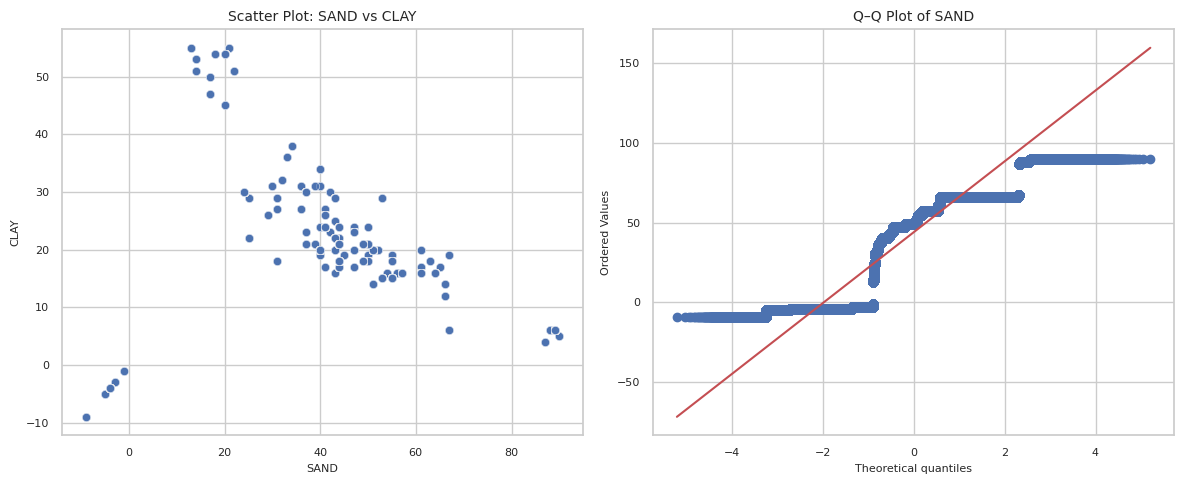

📈 Pearson correlation: 0.579
📊 Spearman correlation: -0.021
------------------------------------------------------------

🌿 Bivariate analysis: SAND (numerical) vs BULK (numerical)
------------------------------------------------------------


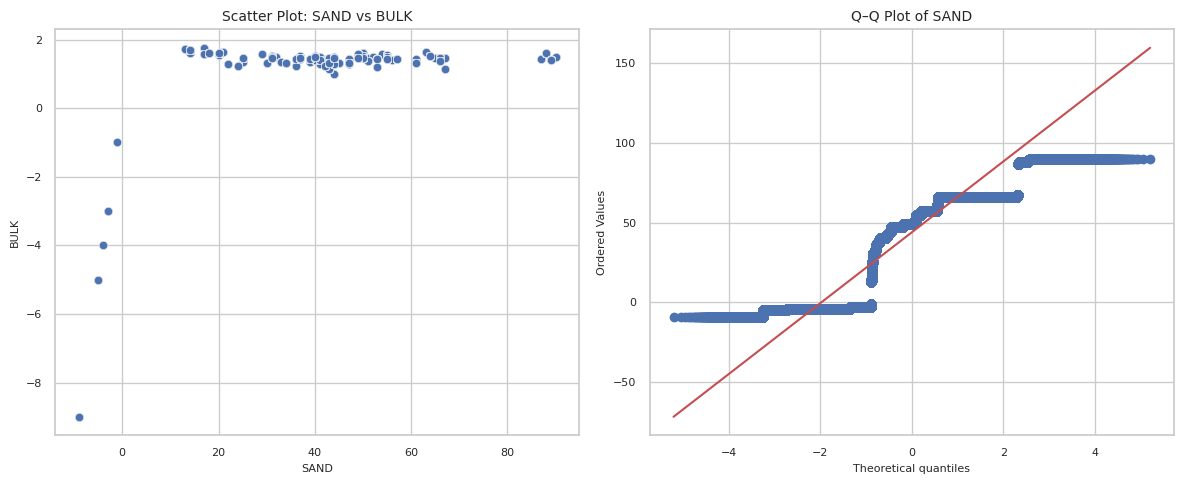

📈 Pearson correlation: 0.905
📊 Spearman correlation: 0.335
------------------------------------------------------------

🌿 Bivariate analysis: SAND (numerical) vs REF_BULK (numerical)
------------------------------------------------------------


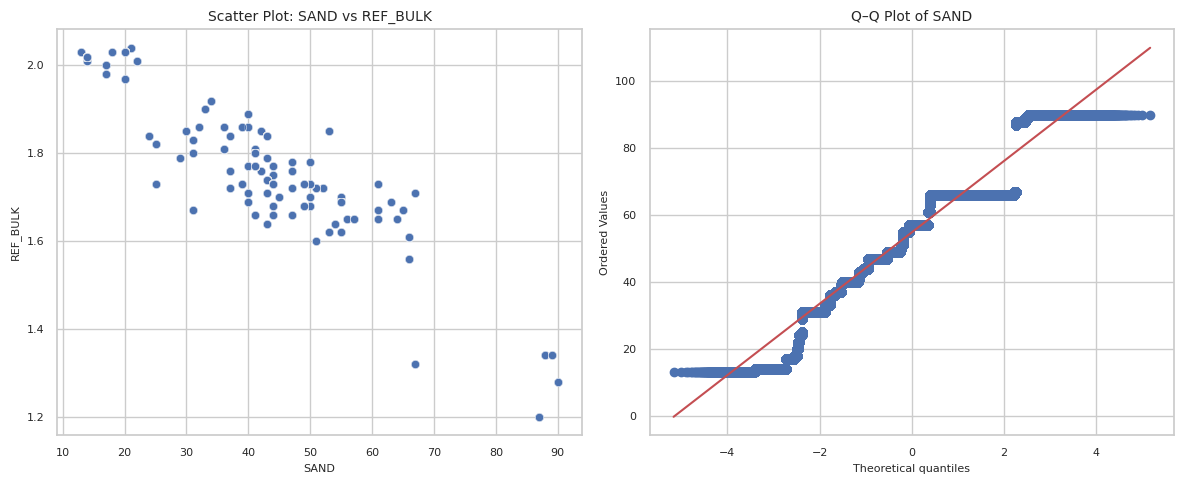

📈 Pearson correlation: -0.913
📊 Spearman correlation: -0.929
------------------------------------------------------------

🌿 Bivariate analysis: SAND (numerical) vs ORG_CARBON (numerical)
------------------------------------------------------------


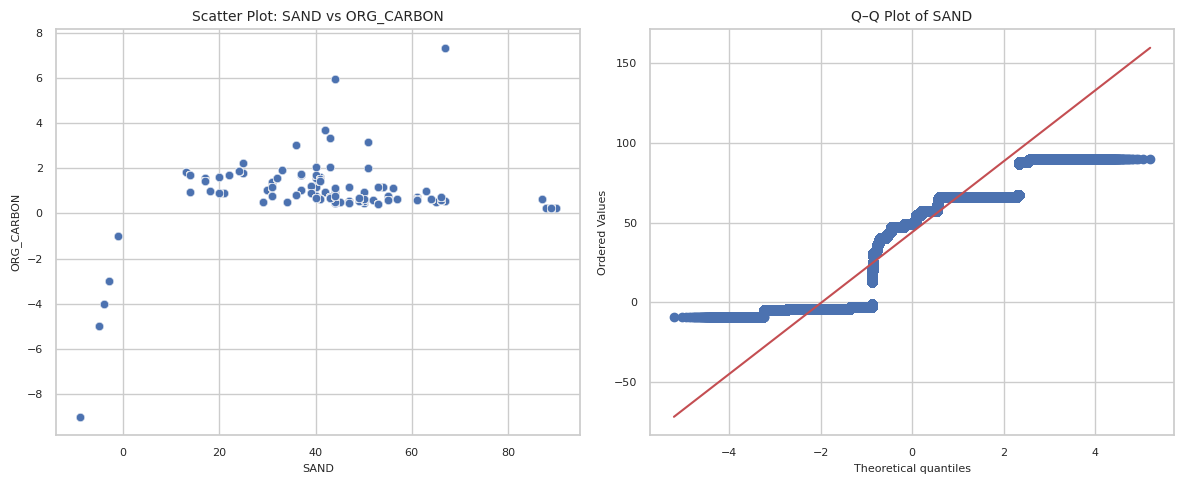

📈 Pearson correlation: 0.851
📊 Spearman correlation: 0.426
------------------------------------------------------------

🌿 Bivariate analysis: SAND (numerical) vs PH_WATER (numerical)
------------------------------------------------------------


MemoryError: Unable to allocate 54.3 MiB for an array with shape (7113536,) and data type float64

Error in callback <function _draw_all_if_interactive at 0x0000017C89BB2020> (for post_execute):


KeyboardInterrupt: 

In [ ]:

# For categorical vs categorical
for col1, col2 in combinations(categorical_cols, 2):
    bivariate_analysis(soil_df, col1, col2, type1="categorical", type2="categorical")

# For numerical vs numerical
for col1, col2 in combinations(numerical_cols, 2):
    bivariate_analysis(soil_df, col1, col2, type1="numerical", type2="numerical")

# For categorical vs numerical
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        bivariate_analysis(soil_df, cat_col, num_col, type1="categorical", type2="numerical")



🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs COARSE (numerical)
------------------------------------------------------------


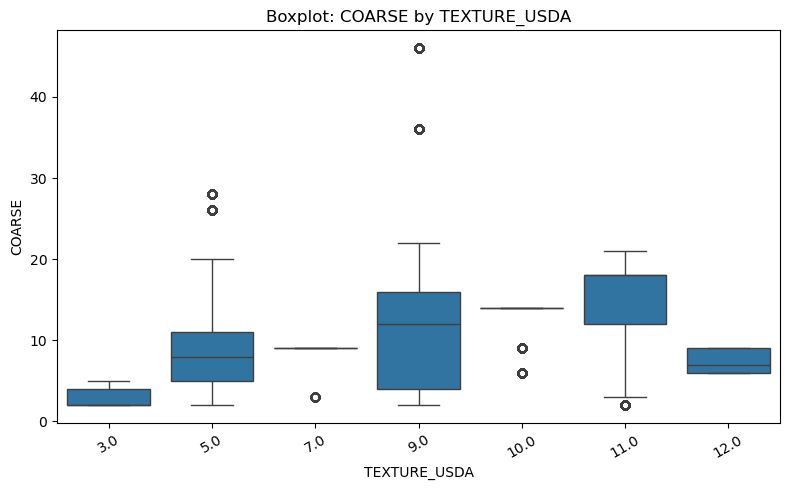

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs SAND (numerical)
------------------------------------------------------------


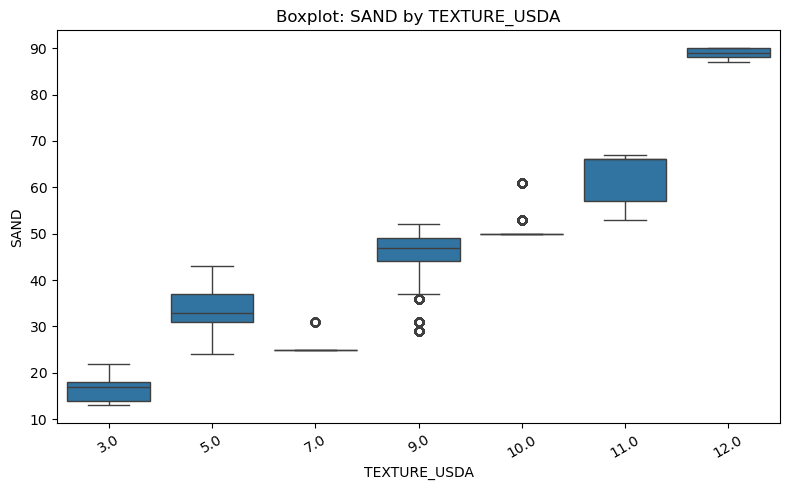

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs SILT (numerical)
------------------------------------------------------------


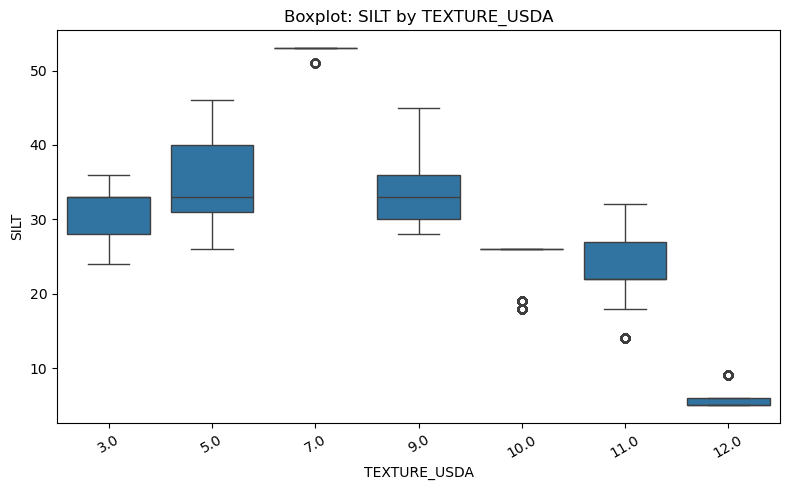

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs CLAY (numerical)
------------------------------------------------------------


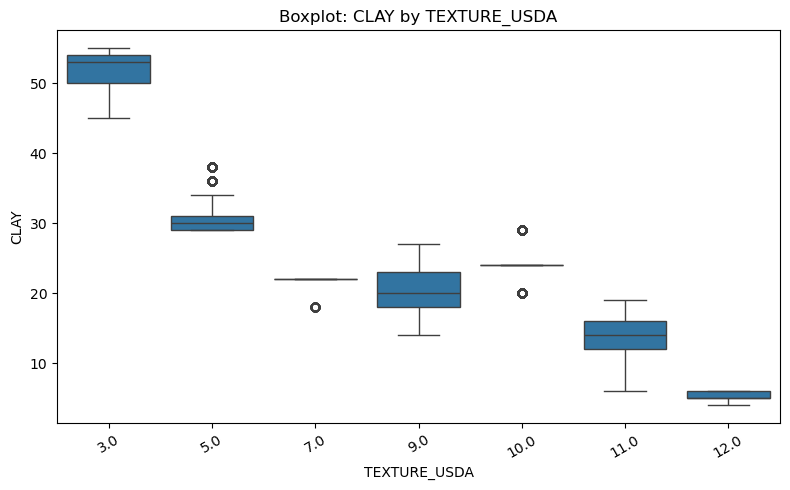

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs BULK (numerical)
------------------------------------------------------------


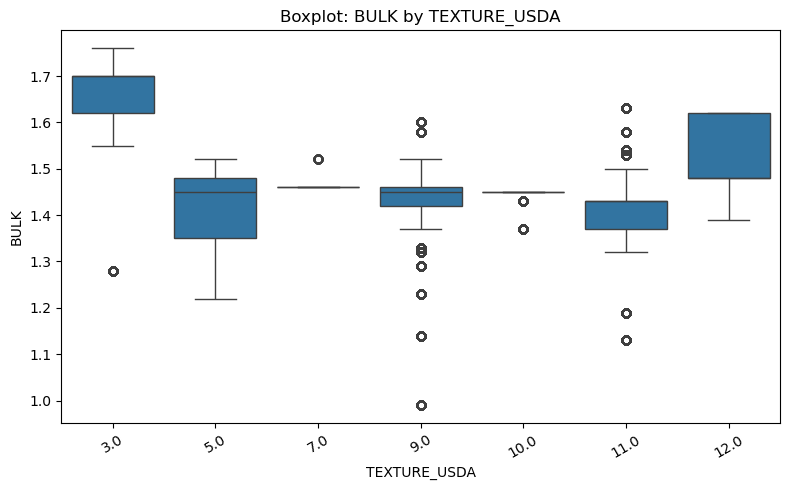

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs REF_BULK (numerical)
------------------------------------------------------------


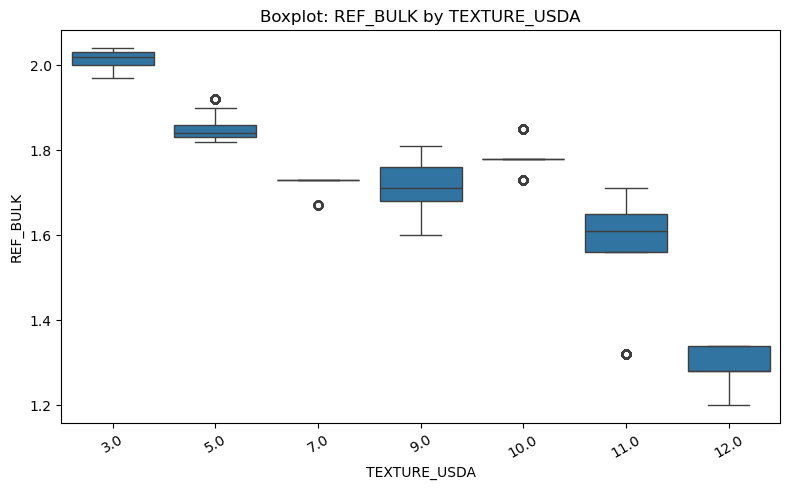

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs ORG_CARBON (numerical)
------------------------------------------------------------


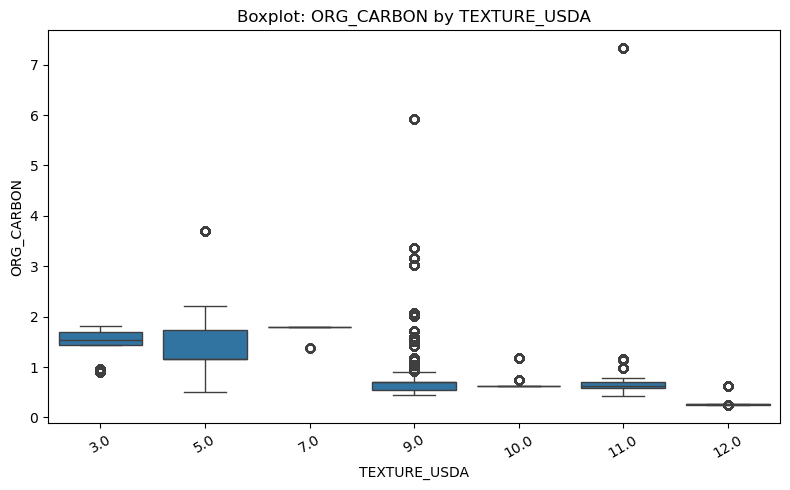

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs PH_WATER (numerical)
------------------------------------------------------------


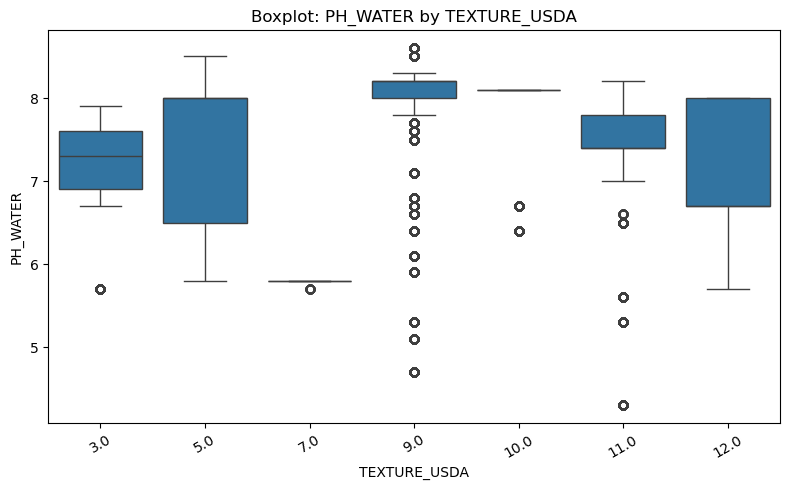

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs TOTAL_N (numerical)
------------------------------------------------------------


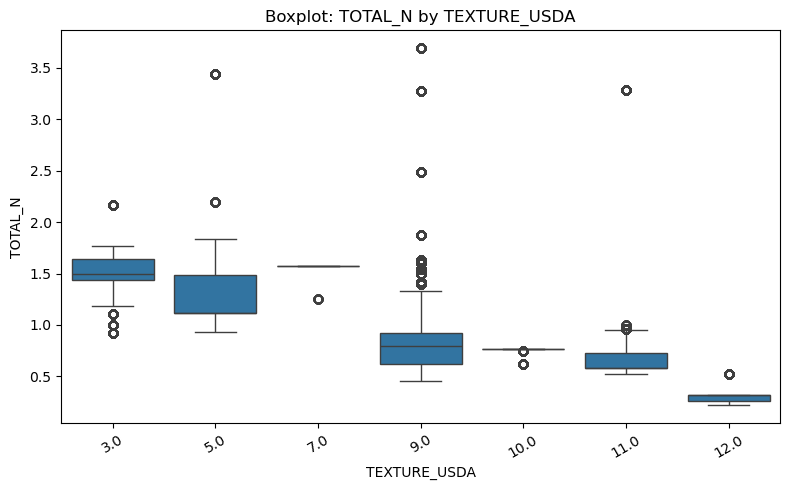

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs CN_RATIO (numerical)
------------------------------------------------------------


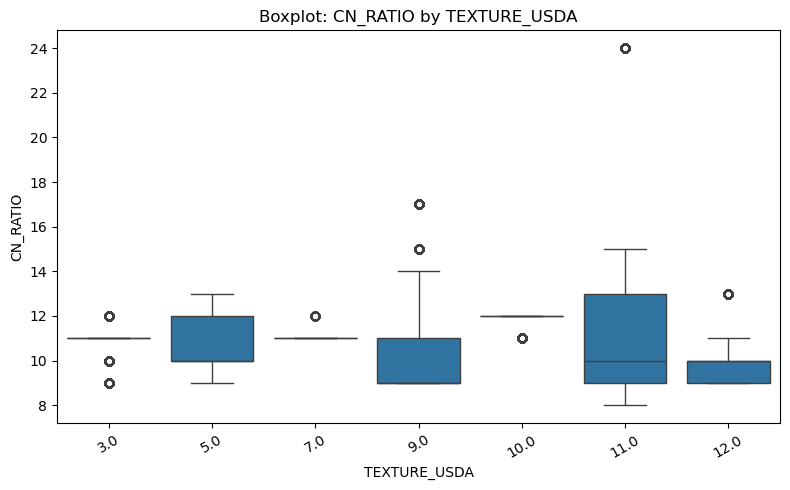

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs CEC_SOIL (numerical)
------------------------------------------------------------


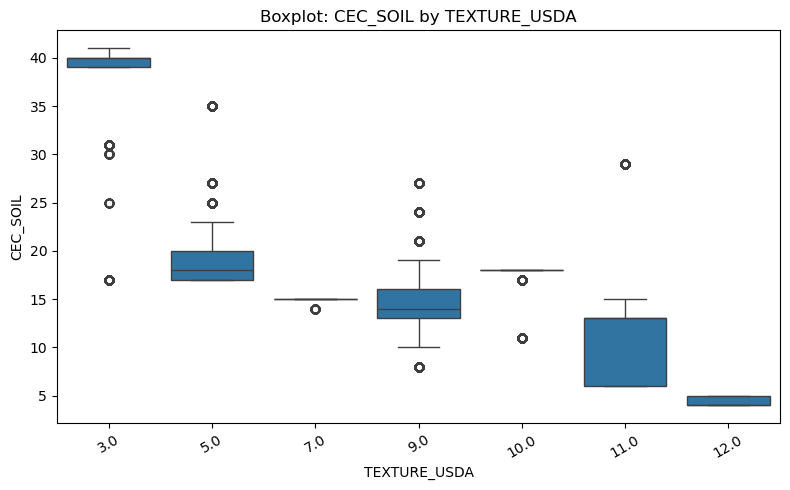

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs CEC_CLAY (numerical)
------------------------------------------------------------


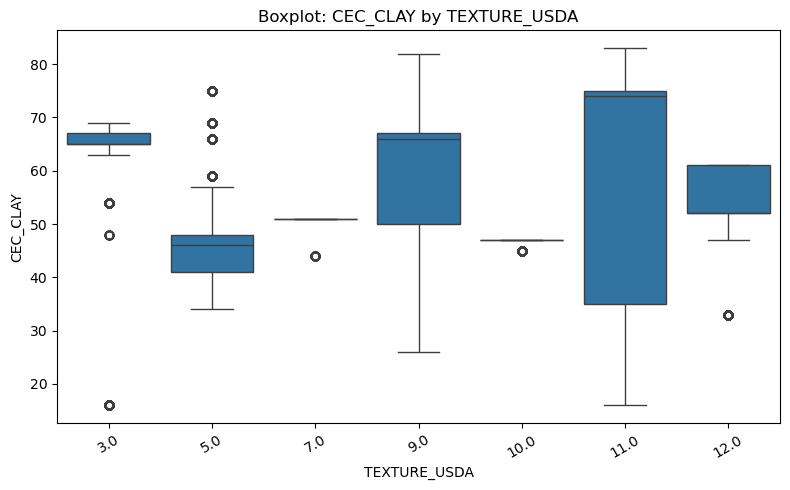

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs CEC_EFF (numerical)
------------------------------------------------------------


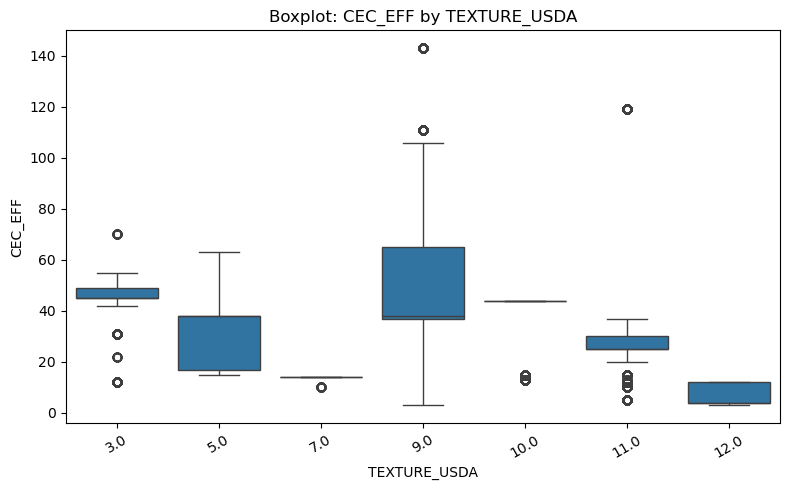

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs TEB (numerical)
------------------------------------------------------------


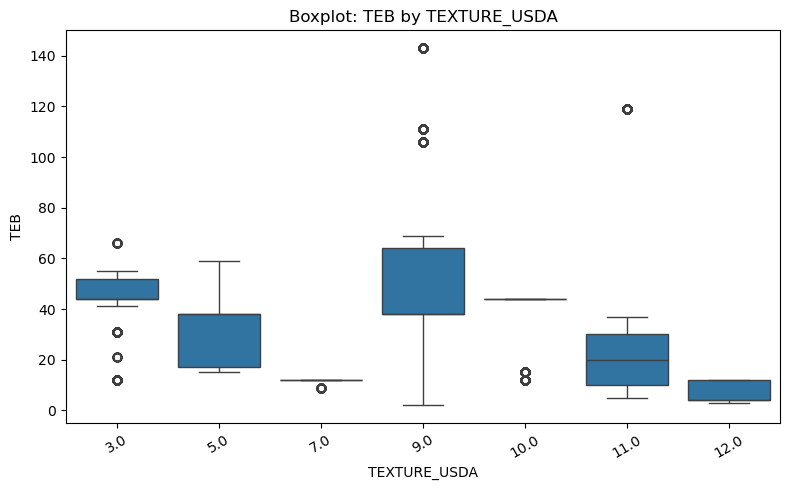

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs BSAT (numerical)
------------------------------------------------------------


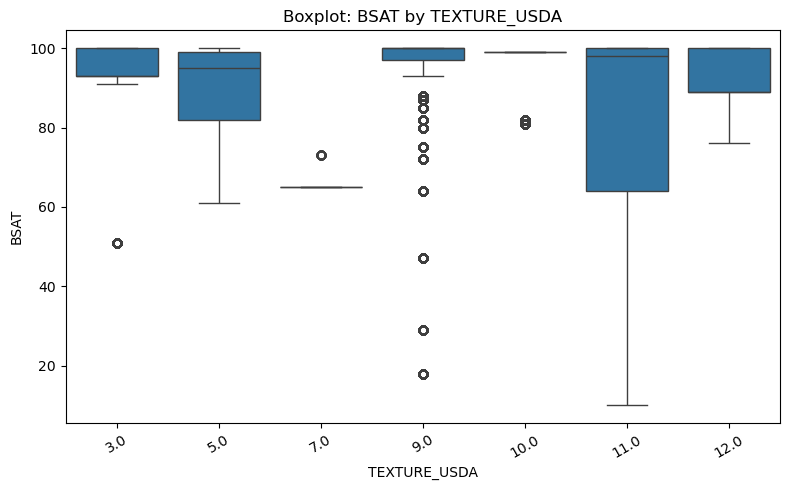

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs ALUM_SAT (numerical)
------------------------------------------------------------


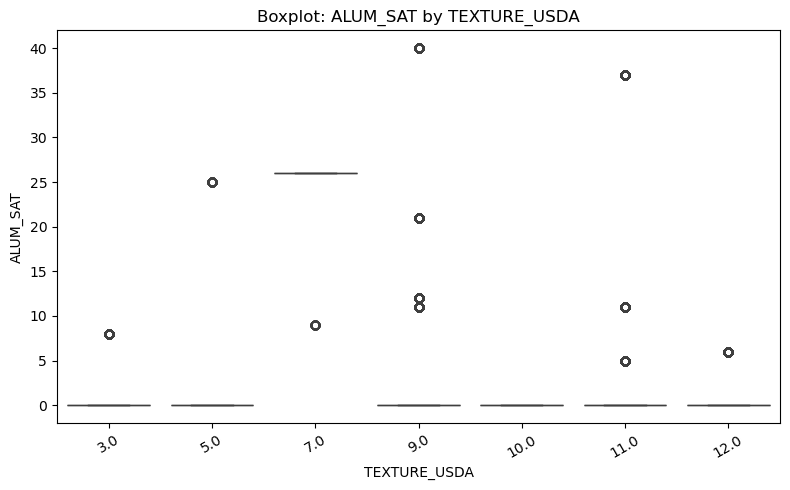

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs ESP (numerical)
------------------------------------------------------------


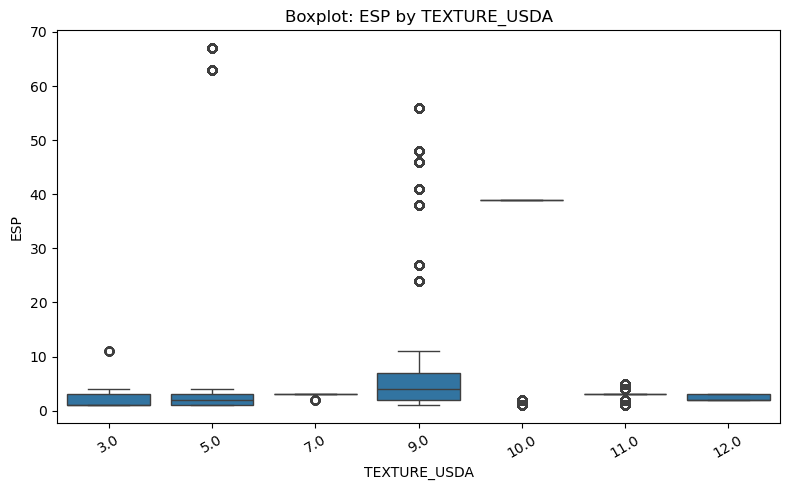

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs TCARBON_EQ (numerical)
------------------------------------------------------------


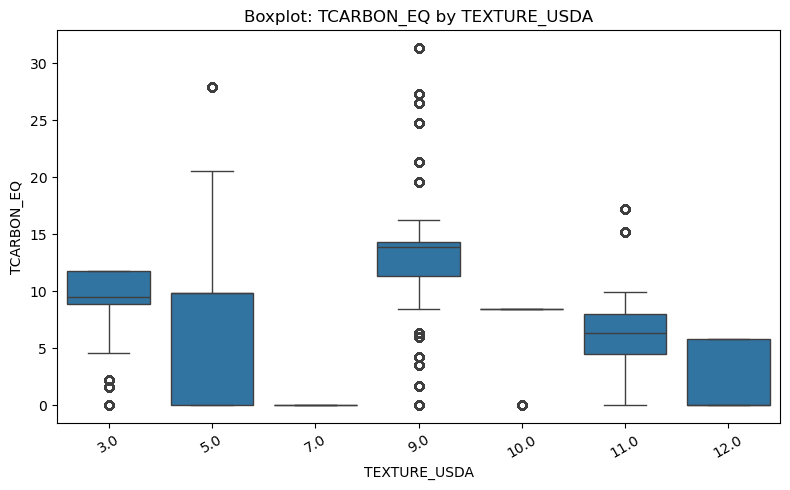

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs GYPSUM (numerical)
------------------------------------------------------------


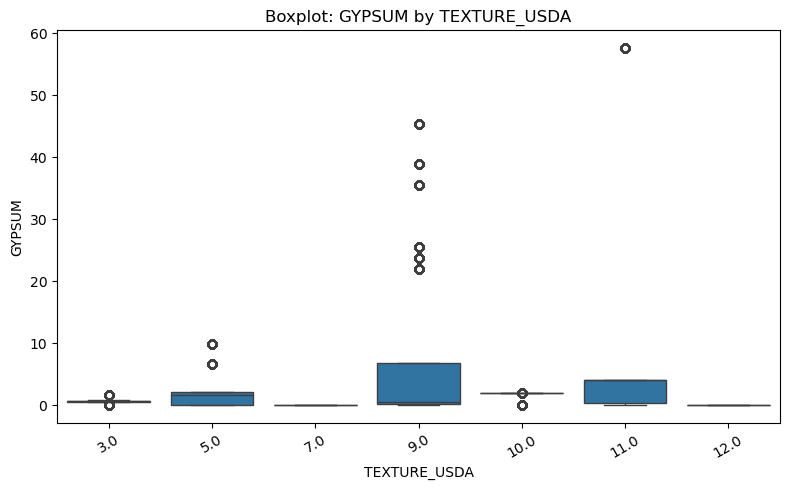

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs ELEC_COND (numerical)
------------------------------------------------------------


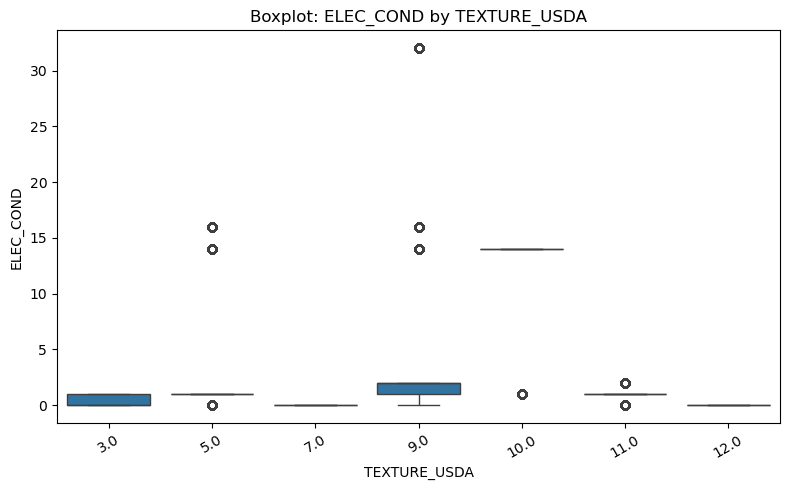

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs COARSE (numerical)
------------------------------------------------------------


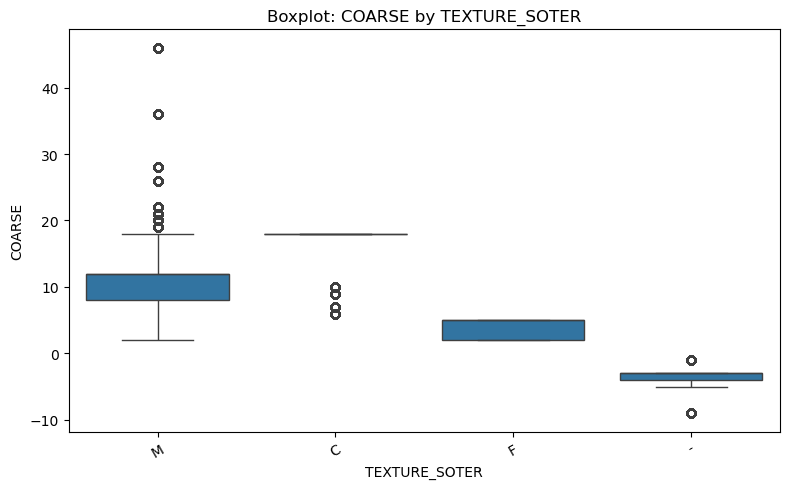

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs SAND (numerical)
------------------------------------------------------------


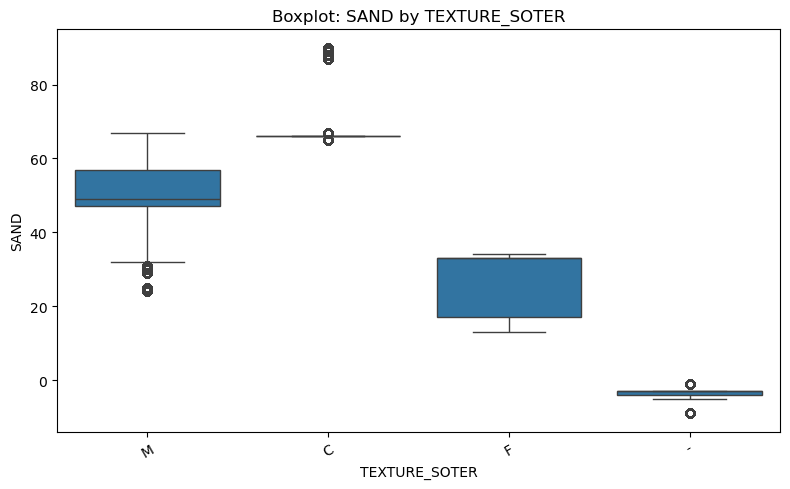

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs SILT (numerical)
------------------------------------------------------------


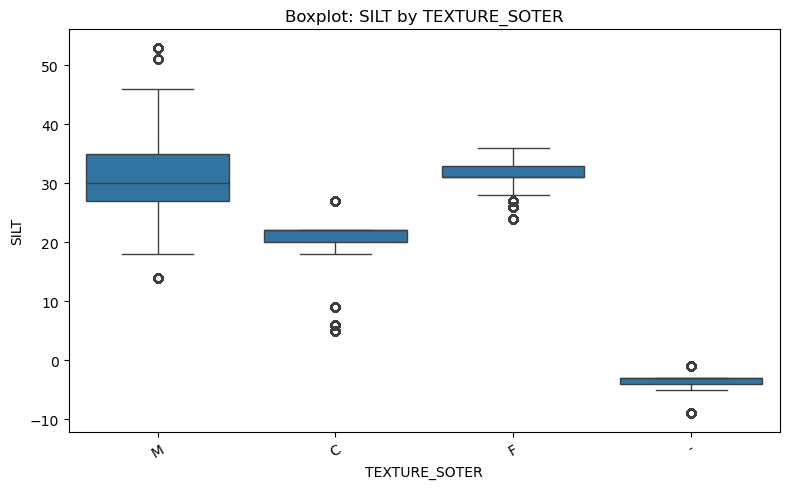

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs CLAY (numerical)
------------------------------------------------------------


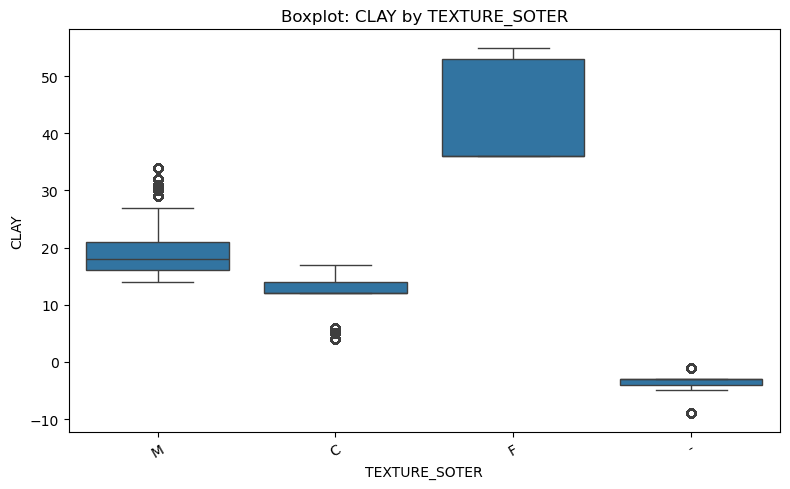

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs BULK (numerical)
------------------------------------------------------------


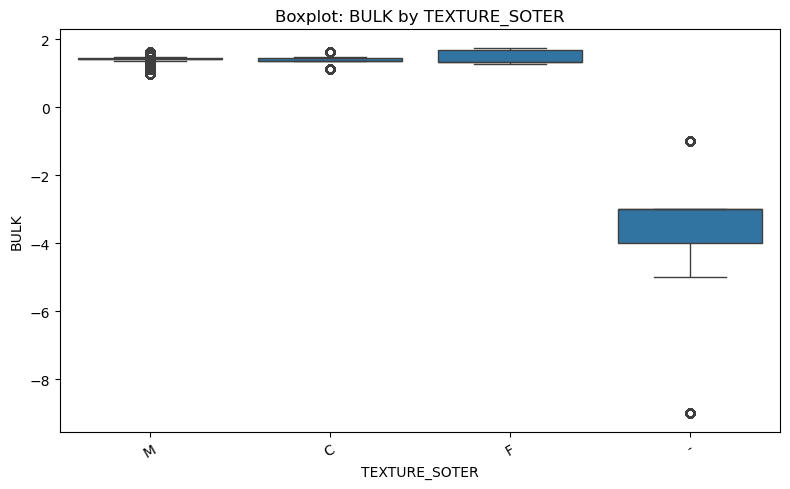

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs REF_BULK (numerical)
------------------------------------------------------------


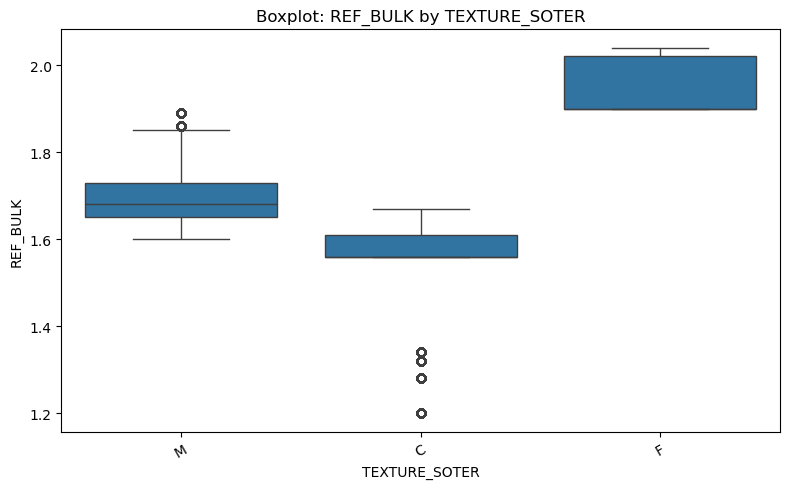

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs ORG_CARBON (numerical)
------------------------------------------------------------


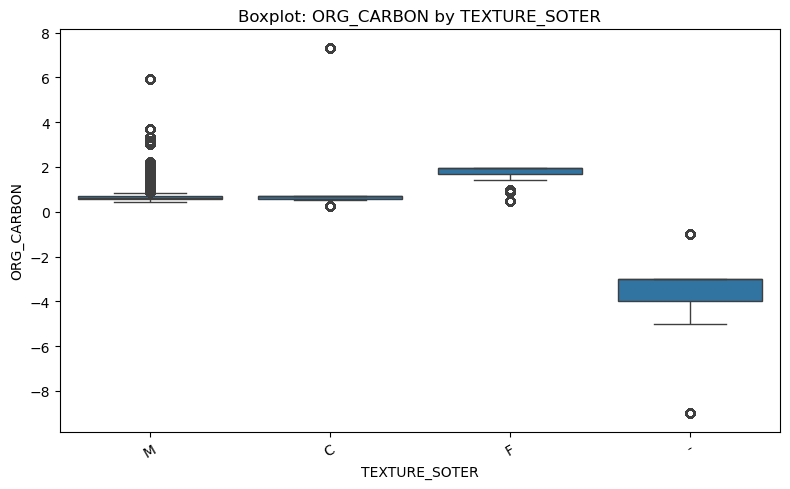

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs PH_WATER (numerical)
------------------------------------------------------------


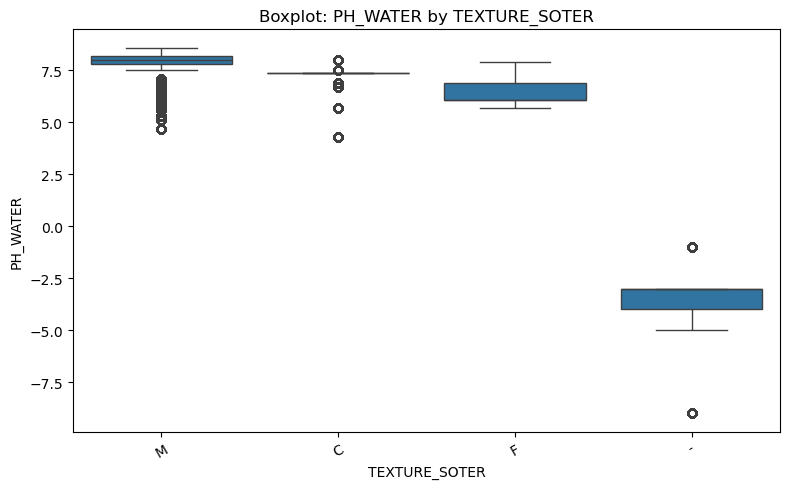

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs TOTAL_N (numerical)
------------------------------------------------------------


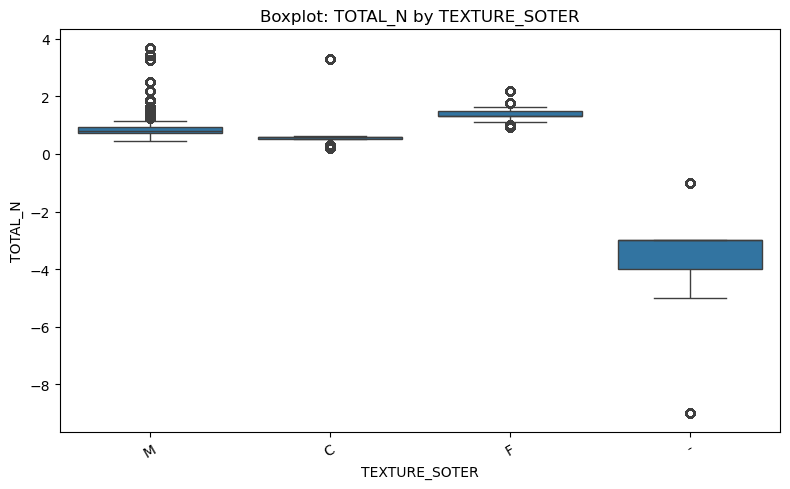

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs CN_RATIO (numerical)
------------------------------------------------------------


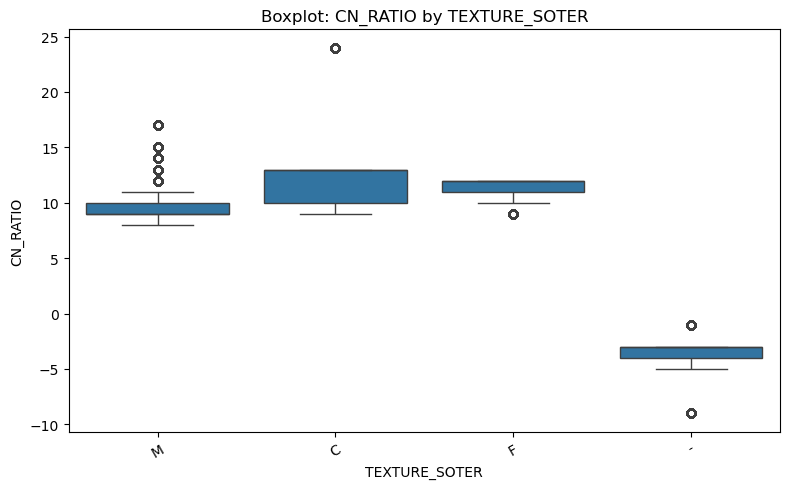

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs CEC_SOIL (numerical)
------------------------------------------------------------


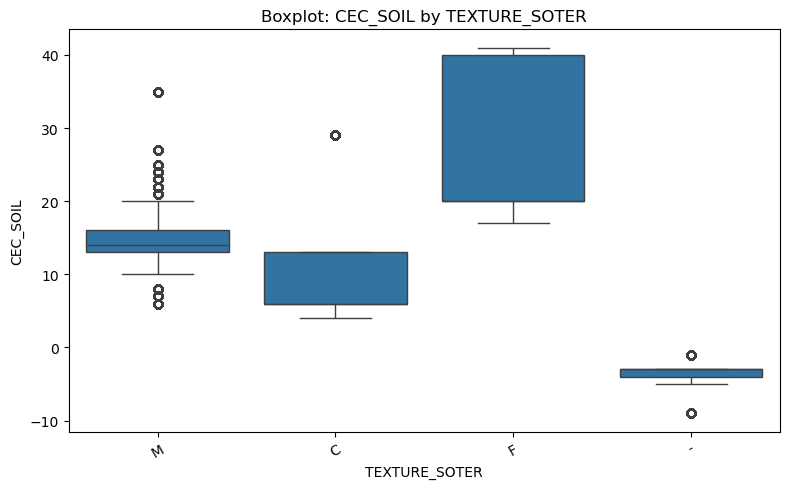

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs CEC_CLAY (numerical)
------------------------------------------------------------


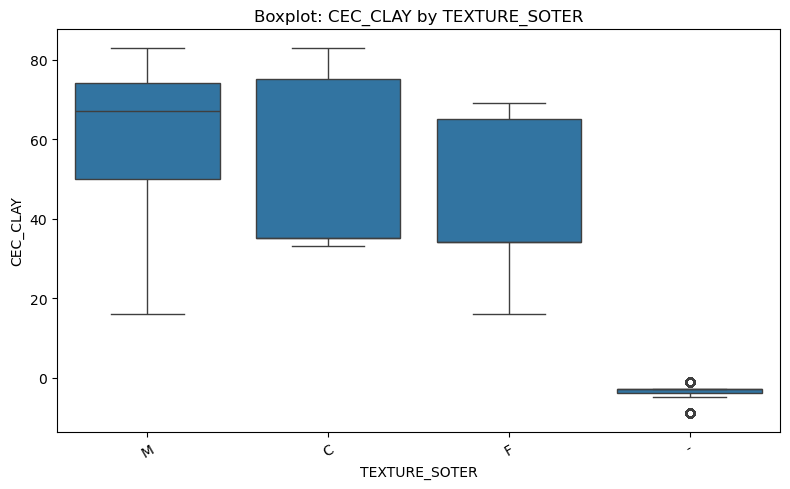

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs CEC_EFF (numerical)
------------------------------------------------------------


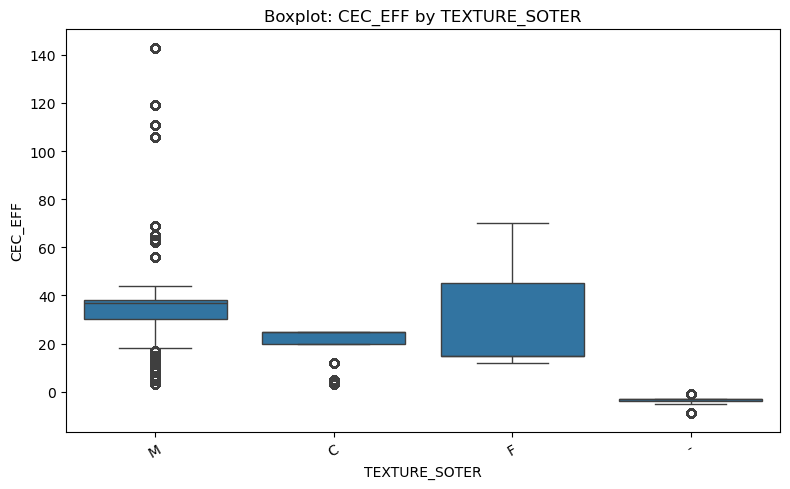

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs TEB (numerical)
------------------------------------------------------------


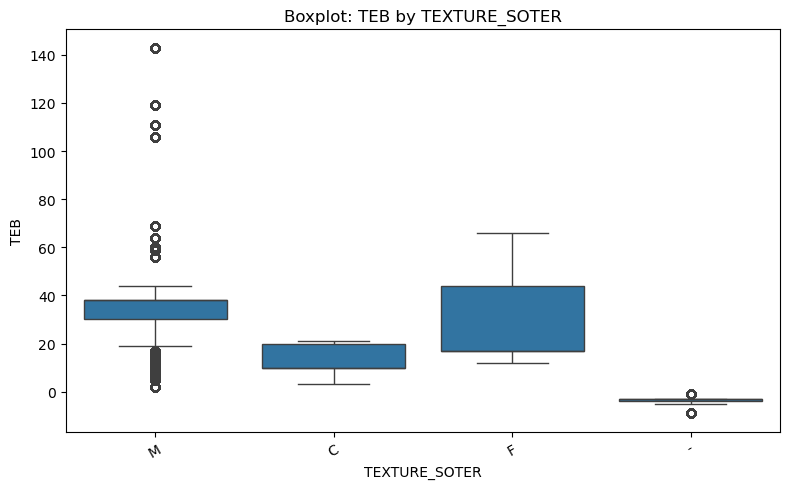

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs BSAT (numerical)
------------------------------------------------------------


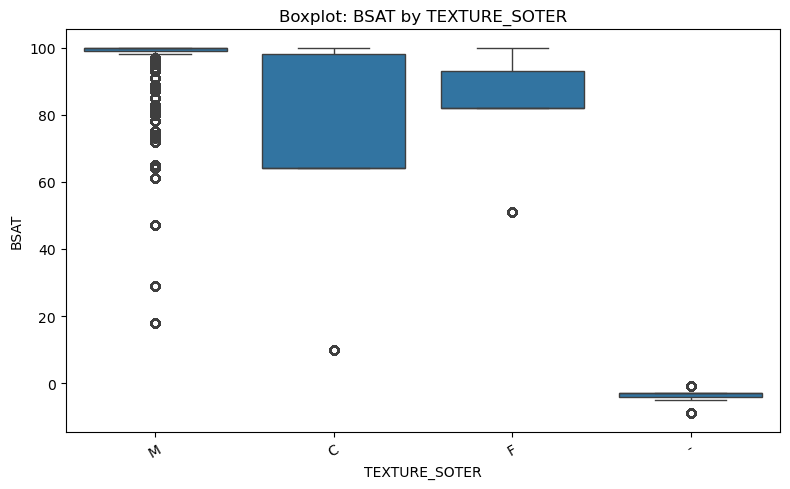

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs ALUM_SAT (numerical)
------------------------------------------------------------


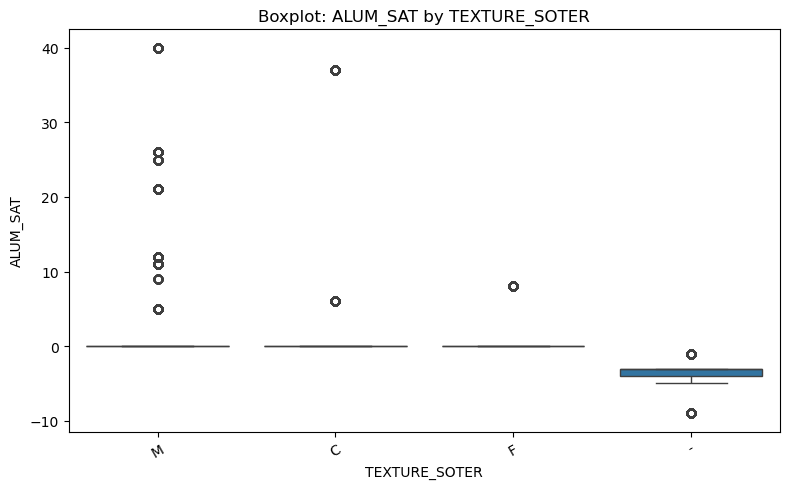

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs ESP (numerical)
------------------------------------------------------------


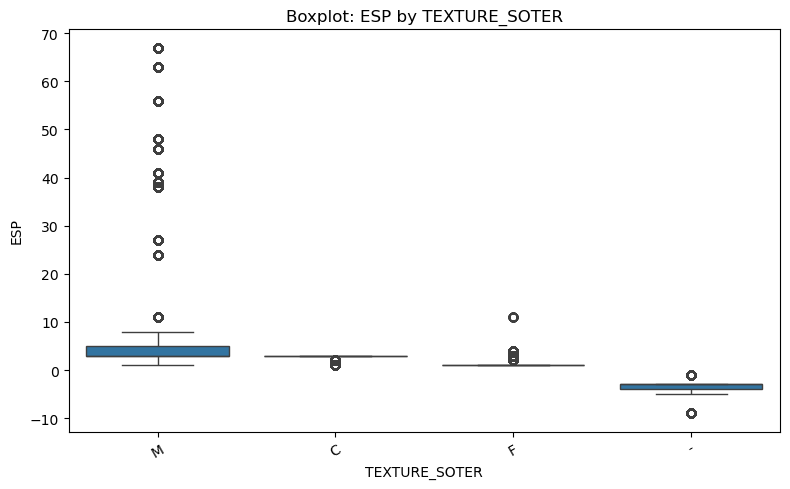

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs TCARBON_EQ (numerical)
------------------------------------------------------------


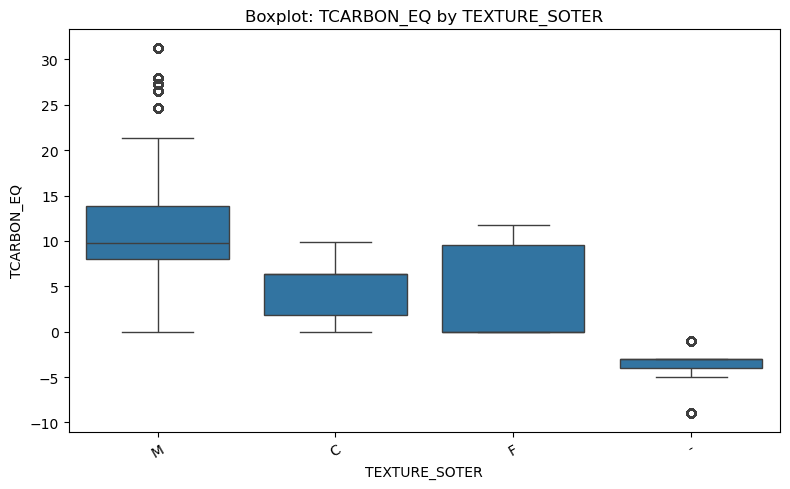

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs GYPSUM (numerical)
------------------------------------------------------------


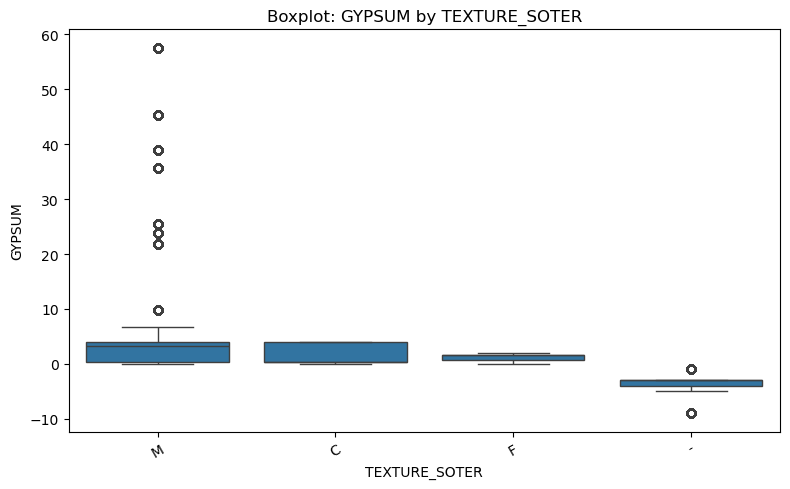

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs ELEC_COND (numerical)
------------------------------------------------------------


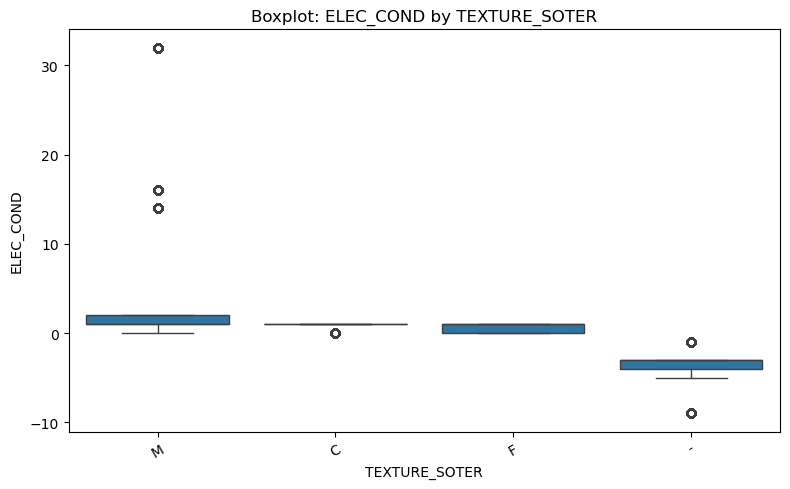

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------


In [8]:
# For categorical vs numerical
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        bivariate_analysis(soil_df, cat_col, num_col, type1="categorical", type2="numerical")

## Multivariate Analysis

In [ ]:
# coorelation matrix for numerical_cols with lower triangle with spearman 
corr_matrix = soil_df[numerical_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

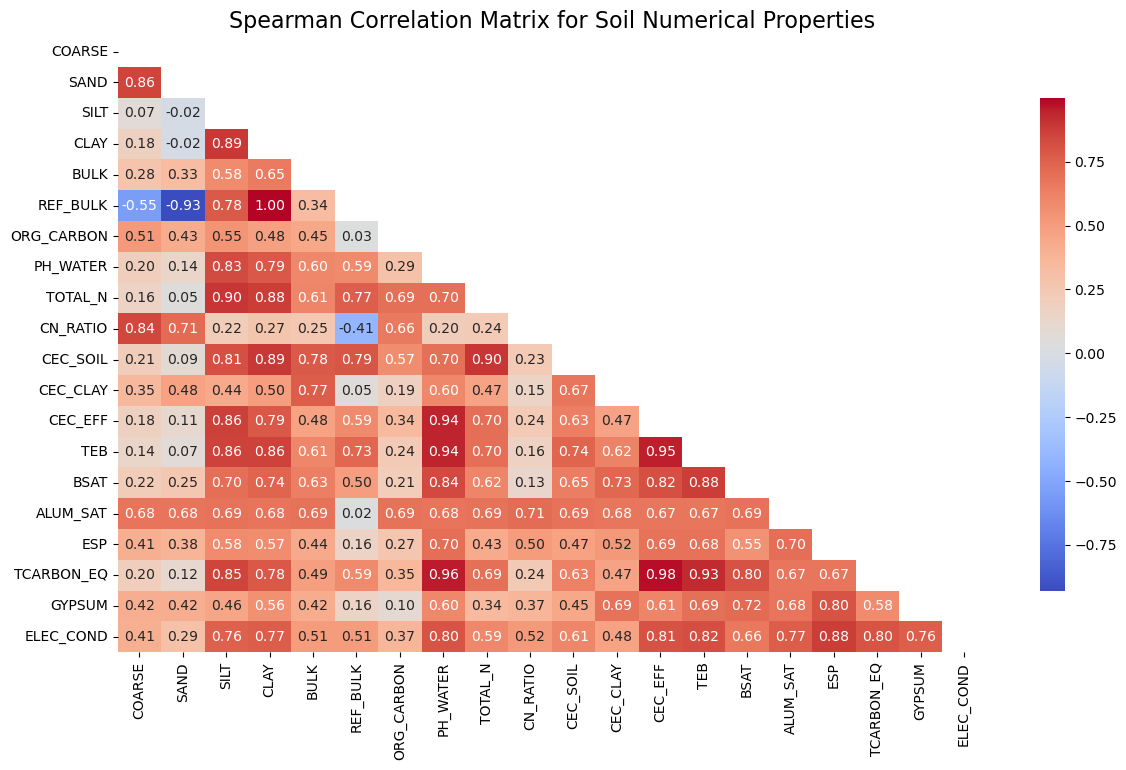

In [15]:
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})
plt.title("Spearman Correlation Matrix for Soil Numerical Properties", fontsize=16)
plt.savefig(os.path.join(Images_dir, f"soil_spearman_correlation_matrix.png"), dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# coorelation matrix for numerical_cols with lower triangle with pearson
corr_matrix = soil_df[numerical_cols].corr(method='pearson')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

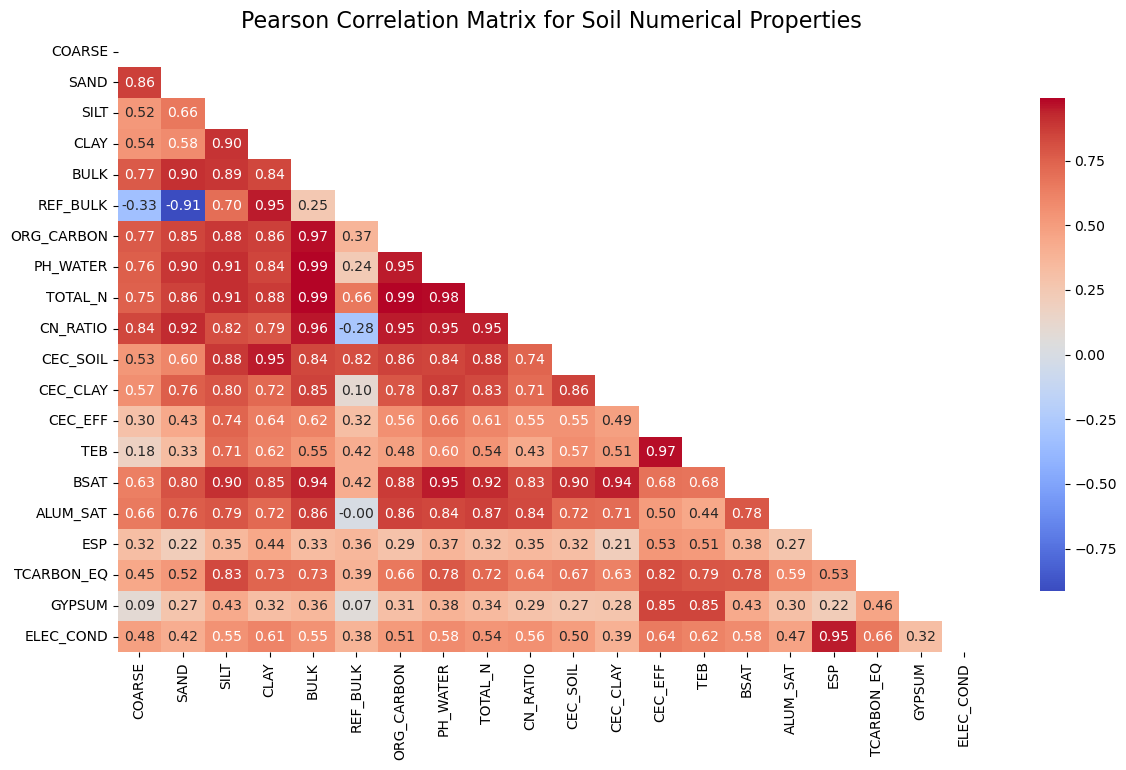

In [17]:
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})
plt.title("Pearson Correlation Matrix for Soil Numerical Properties", fontsize=16)
plt.savefig(os.path.join(Images_dir, f"soil_pearson_correlation_matrix.png"), dpi=300, bbox_inches='tight')
plt.show()